![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/1hr_workshop/SparkNLP_Data_AI_Summit.ipynb)

# Data + AI Summit - Advanced Spark NLP



an intro article for Spark NLP:

https://towardsdatascience.com/introduction-to-spark-nlp-foundations-and-basic-components-part-i-c83b7629ed59

How to start Spark NLP in 2 weeks:

https://towardsdatascience.com/how-to-get-started-with-sparknlp-in-2-weeks-cb47b2ba994d

https://towardsdatascience.com/how-to-wrap-your-head-around-spark-nlp-a6f6a968b7e8

Article for NER and text classification in Spark NLP

https://towardsdatascience.com/named-entity-recognition-ner-with-bert-in-spark-nlp-874df20d1d77

https://medium.com/spark-nlp/named-entity-recognition-for-healthcare-with-sparknlp-nerdl-and-nercrf-a7751b6ad571

https://towardsdatascience.com/text-classification-in-spark-nlp-with-bert-and-universal-sentence-encoders-e644d618ca32

a webinar to show how to train a NER model from scratch (90 min)

https://www.youtube.com/watch?v=djWX0MR2Ooo

workshop repo that you can start playing with Spark NLP in Colab
(you will also see Databricks notebook under each folder)

https://github.com/JohnSnowLabs/spark-nlp-workshop/tree/master/tutorials/Certification_Trainings


In [ ]:
import os

# Install java
! apt-get update -qq
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null

# Install pyspark
! pip install --ignore-installed -q pyspark==2.4.4
! pip install --ignore-installed -q spark-nlp==2.6.1

     |████████████████████████████████| 215.7MB 56kB/s 
     |████████████████████████████████| 204kB 47.6MB/s 
     |████████████████████████████████| 133kB 2.9MB/s 


In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]

In [ ]:
import sparknlp
from pyspark.ml import Pipeline
from sparknlp.base import *
import pyspark.sql.functions as F
from sparknlp.annotator import *

spark = sparknlp.start()

# params =>> gpu=False, spark23=False (start with spark 2.3)

print("Spark NLP version", sparknlp.version())

print("Apache Spark version:", spark.version)


Spark NLP version 2.6.1
Apache Spark version: 2.4.4


## Using Pretrained Pipelines

for a more detailed notebook, see https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Public/1.SparkNLP_Basics.ipynb

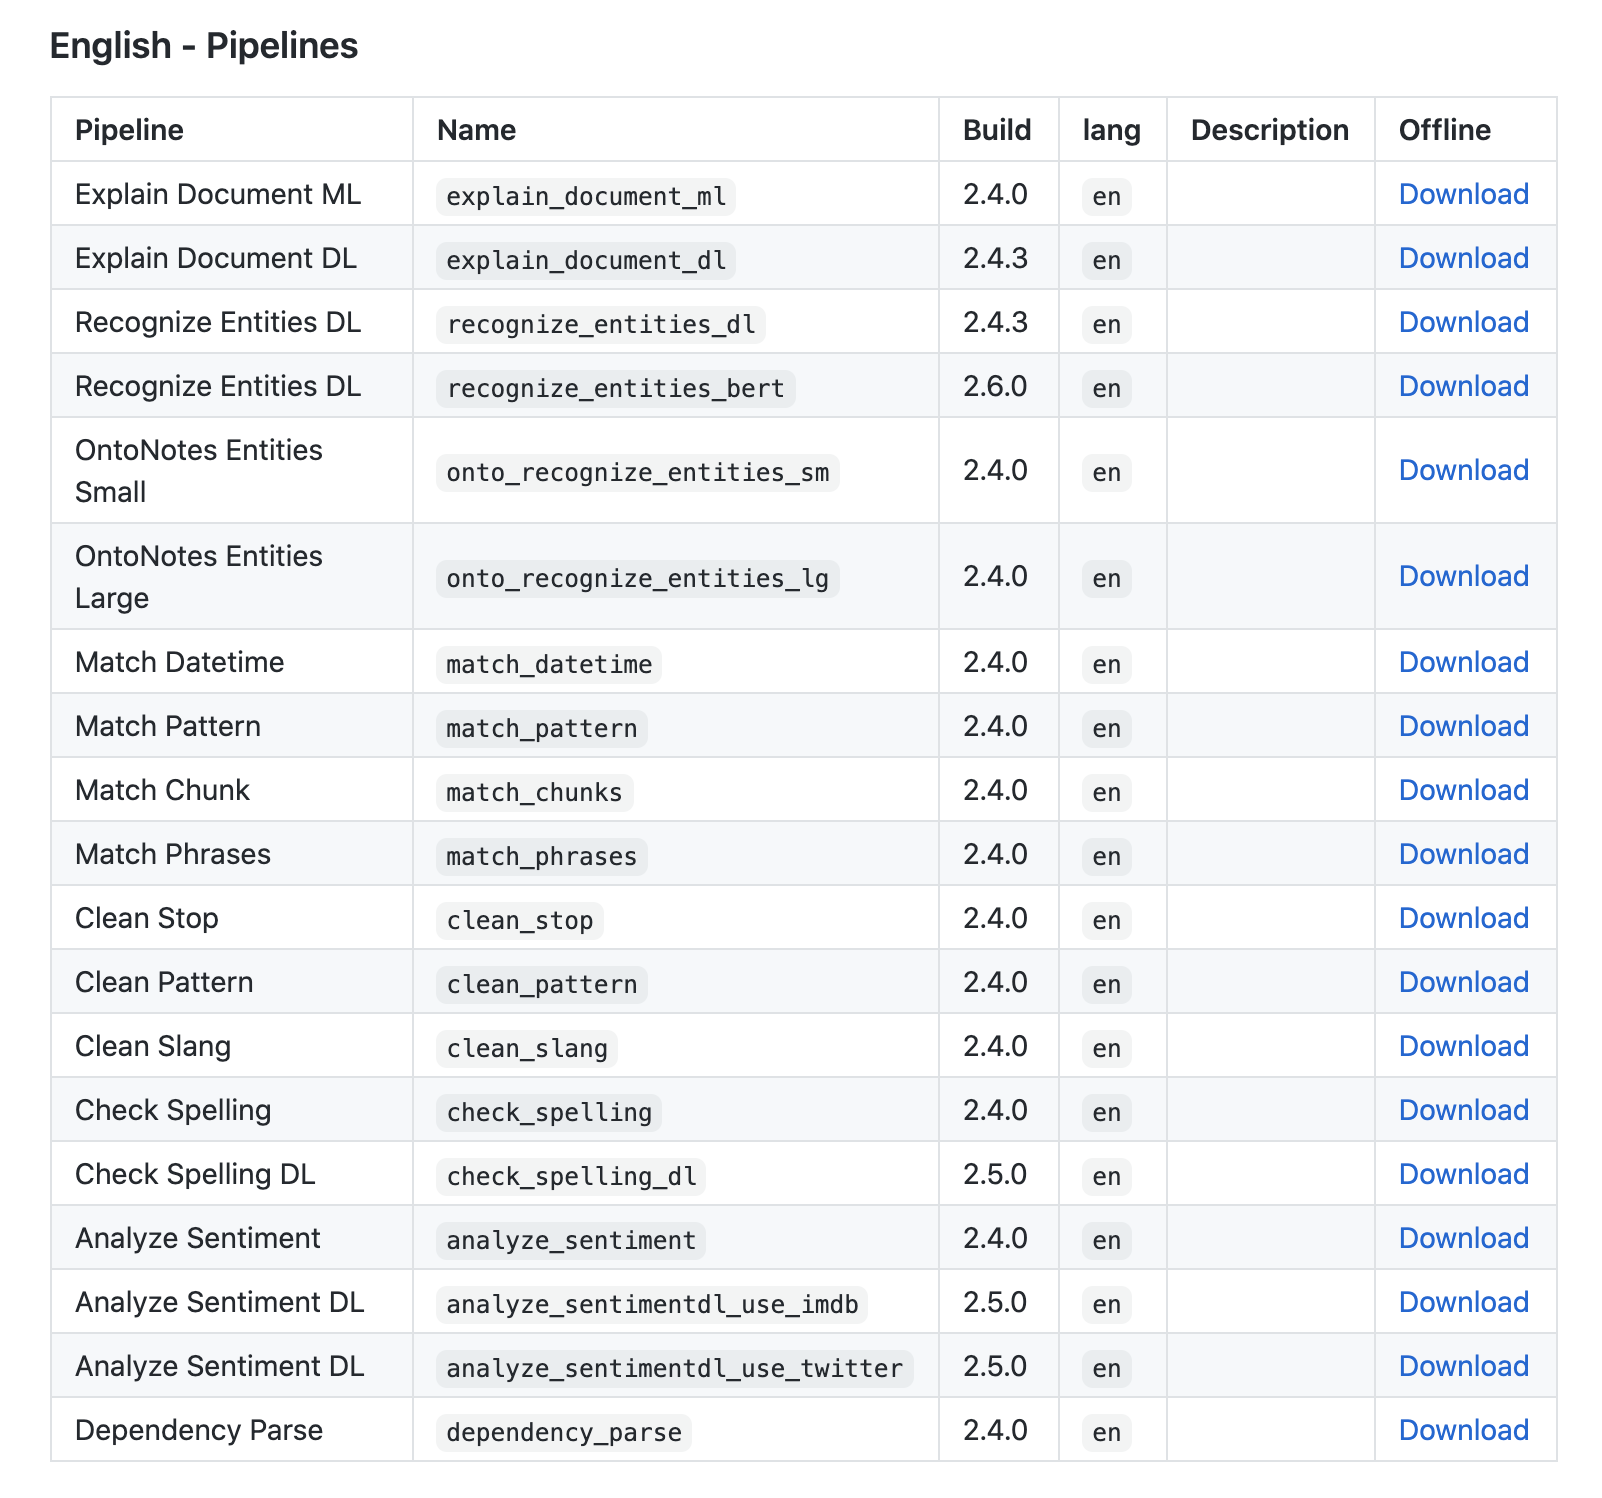

In [ ]:
from sparknlp.pretrained import PretrainedPipeline

pipeline_dl = PretrainedPipeline('explain_document_dl', lang='en')


explain_document_dl download started this may take some time.
Approx size to download 168.4 MB
[OK!]


**Stages**
- DocumentAssembler
- SentenceDetector
- Tokenizer
- NER (NER with GloVe 100D embeddings, CoNLL2003 dataset)
- Lemmatizer
- Stemmer
- Part of Speech
- SpellChecker (Norvig)


In [ ]:
testDoc = '''
Peter Parker is a very good persn.
My life in Russia is very intersting.
John and Peter are brothrs. However they don't support each other that much.
Mercedes Benz is also working on a driverless car.
Europe is very culture rich. There are huge churches! and big houses!
'''

result = pipeline_dl.annotate(testDoc)


In [ ]:
result.keys()

dict_keys(['entities', 'stem', 'checked', 'lemma', 'document', 'pos', 'token', 'ner', 'embeddings', 'sentence'])

In [ ]:
result['entities']

['Peter Parker', 'Russia', 'John', 'Peter', 'Mercedes Benz', 'Europe']

In [ ]:
import pandas as pd

df = pd.DataFrame({'token':result['token'], 'ner_label':result['ner'],
                      'spell_corrected':result['checked'], 'POS':result['pos'],
                      'lemmas':result['lemma'], 'stems':result['stem']})

df

token ner_label spell_corrected   POS      lemmas       stems
0        Peter     B-PER           Peter   NNP       Peter       peter
1       Parker     I-PER          Parker   NNP      Parker      parker
2           is         O              is   VBZ          be           i
3            a         O               a    DT           a           a
4         very         O            very    RB        very        veri
5         good         O            good    JJ        good        good
6        persn         O          person    NN      person      person
7            .         O               .     .           .           .
8           My         O              My  PRP$          My          my
9         life         O            life    NN        life        life
10          in         O              in    IN          in          in
11      Russia     B-LOC          Russia   NNP      Russia      russia
12          is         O              is   VBZ          be           i
13        very         O            very    RB        very        veri
14  intersting         O     interesting    JJ    interest    interest
15           .         O               .     .           .           .
16        John     B-PER            John   NNP        John        john
17         and         O             and    CC         and         and
18       Peter     B-PER           Peter   NNP       Peter       peter
19         are         O             are   VBP          be          ar
20     brothrs         O          broths   NNS       broth       broth
21           .         O               .     .           .           .
22     However         O         However    RB     However       howev
23        they         O            they   PRP        they        thei
24       don't         O           don't   VBP       don't       don't
25     support         O         support    VB     support     support
26        each         O            each    DT        each        each
27       other         O           other    JJ       other       other
28        that         O            that    IN        that        that
29        much         O            much    JJ        much        much
30           .         O               .     .           .           .
31    Mercedes     B-ORG        Mercedes   NNP    Mercedes      merced
32        Benz     I-ORG            Benz   NNP        Benz        benz
33          is         O              is   VBZ          be           i
34        also         O            also    RB        also        also
35     working         O         working   VBG        work        work
36          on         O              on    IN          on          on
37           a         O               a    DT           a           a
38  driverless         O      driverless    JJ  driverless  driverless
39         car         O             car    NN         car         car
40           .         O               .     .           .           .
41      Europe     B-LOC          Europe   NNP      Europe       europ
42          is         O              is   VBZ          be           i
43        very         O            very    RB        very        veri
44     culture         O         culture    RB     culture      cultur
45        rich         O            rich    JJ        rich        rich
46           .         O               .     .           .           .
47       There         O           There    EX       There       there
48         are         O             are   VBP          be          ar
49        huge         O            huge    JJ        huge        huge
50    churches         O        churches   NNS      church      church
51           !         O               !     .           !           !
52         and         O             and    CC         and         and
53         big         O             big    JJ         big         big
54      houses         O          houses   NNS       house        hous
55           !         O         

### Using fullAnnotate to get more details



In [ ]:
detailed_result = pipeline_dl.fullAnnotate(testDoc)

detailed_result[0]['entities']

[Annotation(chunk, 1, 12, Peter Parker, {'entity': 'PER', 'sentence': '0', 'chunk': '0'}),
 Annotation(chunk, 47, 52, Russia, {'entity': 'LOC', 'sentence': '1', 'chunk': '1'}),
 Annotation(chunk, 74, 77, John, {'entity': 'PER', 'sentence': '2', 'chunk': '2'}),
 Annotation(chunk, 83, 87, Peter, {'entity': 'PER', 'sentence': '2', 'chunk': '3'}),
 Annotation(chunk, 151, 163, Mercedes Benz, {'entity': 'ORG', 'sentence': '4', 'chunk': '4'}),
 Annotation(chunk, 202, 207, Europe, {'entity': 'LOC', 'sentence': '5', 'chunk': '5'})]

In [ ]:
chunks=[]
entities=[]
for n in detailed_result[0]['entities']:
        
  chunks.append(n.result)
  entities.append(n.metadata['entity']) 
    
df = pd.DataFrame({'chunks':chunks, 'entities':entities})
df    

chunks entities
0   Peter Parker      PER
1         Russia      LOC
2           John      PER
3          Peter      PER
4  Mercedes Benz      ORG
5         Europe      LOC

In [ ]:
tuples = []

for x,y,z in zip(detailed_result[0]["token"], detailed_result[0]["pos"], detailed_result[0]["ner"]):

  tuples.append((int(x.metadata['sentence']), x.result, x.begin, x.end, y.result, z.result))

df = pd.DataFrame(tuples, columns=['sent_id','token','start','end','pos', 'ner'])

df


sent_id       token  start  end   pos    ner
0         0       Peter      1    5   NNP  B-PER
1         0      Parker      7   12   NNP  I-PER
2         0          is     14   15   VBZ      O
3         0           a     17   17    DT      O
4         0        very     19   22    RB      O
5         0        good     24   27    JJ      O
6         0       persn     29   33    NN      O
7         0           .     34   34     .      O
8         1          My     36   37  PRP$      O
9         1        life     39   42    NN      O
10        1          in     44   45    IN      O
11        1      Russia     47   52   NNP  B-LOC
12        1          is     54   55   VBZ      O
13        1        very     57   60    RB      O
14        1  intersting     62   71    JJ      O
15        1           .     72   72     .      O
16        2        John     74   77   NNP  B-PER
17        2         and     79   81    CC      O
18        2       Peter     83   87   NNP  B-PER
19        2         are     89   91   VBP      O
20        2     brothrs     93   99   NNS      O
21        2           .    100  100     .      O
22        3     However    102  108    RB      O
23        3        they    110  113   PRP      O
24        3       don't    115  119   VBP      O
25        3     support    121  127    VB      O
26        3        each    129  132    DT      O
27        3       other    134  138    JJ      O
28        3        that    140  143    IN      O
29        3        much    145  148    JJ      O
30        3           .    149  149     .      O
31        4    Mercedes    151  158   NNP  B-ORG
32        4        Benz    160  163   NNP  I-ORG
33        4          is    165  166   VBZ      O
34        4        also    168  171    RB      O
35        4     working    173  179   VBG      O
36        4          on    181  182    IN      O
37        4           a    184  184    DT      O
38        4  driverless    186  195    JJ      O
39        4         car    197  199    NN      O
40        4           .    200  200     .      O
41        5      Europe    202  207   NNP  B-LOC
42        5          is    209  210   VBZ      O
43        5        very    212  215    RB      O
44        5     culture    217  223    RB      O
45        5        rich    225  228    JJ      O
46        5           .    229  229     .      O
47        6       There    231  235    EX      O
48        6         are    237  239   VBP      O
49        6        huge    241  244    JJ      O
50        6    churches    246  253   NNS      O
51        6           !    254  254     .      O
52        7         and    256  258    CC      O
53        7         big    260  262    JJ      O
54        7      houses    264  269   NNS      O
55        7           !    270  270     .      O

### Spell Checker DL

https://medium.com/spark-nlp/applying-context-aware-spell-checking-in-spark-nlp-3c29c46963bc

In [ ]:
spell_checker_dl = PretrainedPipeline('check_spelling_dl', lang='en')


check_spelling_dl download started this may take some time.
Approx size to download 112.1 MB
[OK!]


In [ ]:
text = 'We will go to swimming if the ueather is nice.'

result = spell_checker_dl.annotate(text)

list(zip(result['token'], result['checked']))

[('We', 'We'),
 ('will', 'will'),
 ('go', 'go'),
 ('to', 'to'),
 ('swimming', 'swimming'),
 ('if', 'if'),
 ('the', 'the'),
 ('ueather', 'weather'),
 ('is', 'is'),
 ('nice', 'nice'),
 ('.', '.')]

In [ ]:
# check for the different occurrences of the word "ueather"
examples = ['We will go to swimming if the ueather is nice.',\
    "I have a black ueather jacket, so nice.",\
    "I introduce you to my sister, she is called ueather."]

results = spell_checker_dl.annotate(examples)

for result in results:
  print (list(zip(result['token'], result['checked'])))

[('We', 'We'), ('will', 'will'), ('go', 'go'), ('to', 'to'), ('swimming', 'swimming'), ('if', 'if'), ('the', 'the'), ('ueather', 'weather'), ('is', 'is'), ('nice', 'nice'), ('.', '.')]
[('I', 'I'), ('have', 'have'), ('a', 'a'), ('black', 'black'), ('ueather', 'leather'), ('jacket', 'jacket'), (',', ','), ('so', 'so'), ('nice', 'nice'), ('.', '.')]
[('I', 'I'), ('introduce', 'introduce'), ('you', 'you'), ('to', 'to'), ('my', 'my'), ('sister', 'sister'), (',', ','), ('she', 'she'), ('is', 'is'), ('called', 'called'), ('ueather', 'Heather'), ('.', '.')]


### Extract exact dates from referential date phrases

In [ ]:
pipeline = PretrainedPipeline('match_datetime', lang='en')

detailed_result = pipeline.fullAnnotate("I saw him yesterday and he told me that he will visit us next week")

detailed_result[0]['date']

match_datetime download started this may take some time.
Approx size to download 12.9 KB
[OK!]


[Annotation(date, 57, 65, 2020/10/01, {'sentence': '0'}),
 Annotation(date, 10, 18, 2020/09/23, {'sentence': '0'})]

### Sentiment Analysis


In [ ]:
sentiment = PretrainedPipeline('analyze_sentiment', lang='en')

analyze_sentiment download started this may take some time.
Approx size to download 4.9 MB
[OK!]


In [ ]:
result = sentiment.annotate("The movie I watched today was not a good one")

result['sentiment']

['negative']

In [ ]:
# DL version (using Universal sentence encoder - USE)
# 930 MB as it downloads the USE as well
sentiment_twitter = PretrainedPipeline('analyze_sentimentdl_use_twitter', lang='en')

## Using the modules in a pipeline for custom tasks

for a more detailed notebook, see https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Public/2.Text_Preprocessing_with_SparkNLP_Annotators_Transformers.ipynb

In [ ]:
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/examples/python/annotation/text/english/spark-nlp-basics/sample-sentences-en.txt

In [ ]:
with open('./sample-sentences-en.txt') as f:
  print (f.read())

Peter is a very good person.
My life in Russia is very interesting.
John and Peter are brothers. However they don't support each other that much.
Lucas Nogal Dunbercker is no longer happy. He has a good car though.
Europe is very culture rich. There are huge churches! and big houses!


In [ ]:
spark_df = spark.read.text('./sample-sentences-en.txt').toDF('text')

spark_df.show(truncate=False)

+-----------------------------------------------------------------------------+
|text                                                                         |
+-----------------------------------------------------------------------------+
|Peter is a very good person.                                                 |
|My life in Russia is very interesting.                                       |
|John and Peter are brothers. However they don't support each other that much.|
|Lucas Nogal Dunbercker is no longer happy. He has a good car though.         |
|Europe is very culture rich. There are huge churches! and big houses!        |
+-----------------------------------------------------------------------------+



In [ ]:
textFiles = spark.sparkContext.wholeTextFiles("./*.txt",4)
    
spark_df_folder = textFiles.toDF(schema=['path','text'])

spark_df_folder.show(truncate=30)

+------------------------------+------------------------------+
|                          path|                          text|
+------------------------------+------------------------------+
|file:/content/sample-senten...|Peter is a very good person...|
+------------------------------+------------------------------+



In [ ]:
documentAssembler = DocumentAssembler()\
.setInputCol("text")\
.setOutputCol("document")

sentenceDetector = SentenceDetector().\
setInputCols(['document']).\
setOutputCol('sentences')

tokenizer = Tokenizer() \
    .setInputCols(["sentences"]) \
    .setOutputCol("token")

nlpPipeline = Pipeline(stages=[
 documentAssembler, 
 sentenceDetector,
 tokenizer
 ])

empty_df = spark.createDataFrame([['']]).toDF("text")

pipelineModel = nlpPipeline.fit(empty_df)

In [ ]:
result = pipelineModel.transform(spark_df)


In [ ]:
result.show(truncate=20)


+--------------------+--------------------+--------------------+--------------------+
|                text|            document|           sentences|               token|
+--------------------+--------------------+--------------------+--------------------+
|Peter is a very g...|[[document, 0, 27...|[[document, 0, 27...|[[token, 0, 4, Pe...|
|My life in Russia...|[[document, 0, 37...|[[document, 0, 37...|[[token, 0, 1, My...|
|John and Peter ar...|[[document, 0, 76...|[[document, 0, 27...|[[token, 0, 3, Jo...|
|Lucas Nogal Dunbe...|[[document, 0, 67...|[[document, 0, 41...|[[token, 0, 4, Lu...|
|Europe is very cu...|[[document, 0, 68...|[[document, 0, 27...|[[token, 0, 5, Eu...|
+--------------------+--------------------+--------------------+--------------------+



In [ ]:
result.select('sentences.result').take(3)


[Row(result=['Peter is a very good person.']),
 Row(result=['My life in Russia is very interesting.']),
 Row(result=['John and Peter are brothers.', "However they don't support each other that much."])]

### StopWords Cleaner

In [ ]:
stopwords_cleaner = StopWordsCleaner()\
      .setInputCols("token")\
      .setOutputCol("cleanTokens")\
      .setCaseSensitive(False)\

In [ ]:
stopwords_cleaner.getStopWords()[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your']

In [ ]:
documentAssembler = DocumentAssembler()\
.setInputCol("text")\
.setOutputCol("document")

tokenizer = Tokenizer() \
    .setInputCols(["document"]) \
    .setOutputCol("token")

nlpPipeline = Pipeline(stages=[
 documentAssembler, 
 tokenizer,
 stopwords_cleaner
 ])

empty_df = spark.createDataFrame([['']]).toDF("text")

pipelineModel = nlpPipeline.fit(empty_df)

result = pipelineModel.transform(spark_df)

result.show()

+--------------------+--------------------+--------------------+--------------------+
|                text|            document|               token|         cleanTokens|
+--------------------+--------------------+--------------------+--------------------+
|Peter is a very g...|[[document, 0, 27...|[[token, 0, 4, Pe...|[[token, 0, 4, Pe...|
|My life in Russia...|[[document, 0, 37...|[[token, 0, 1, My...|[[token, 3, 6, li...|
|John and Peter ar...|[[document, 0, 76...|[[token, 0, 3, Jo...|[[token, 0, 3, Jo...|
|Lucas Nogal Dunbe...|[[document, 0, 67...|[[token, 0, 4, Lu...|[[token, 0, 4, Lu...|
|Europe is very cu...|[[document, 0, 68...|[[token, 0, 5, Eu...|[[token, 0, 5, Eu...|
+--------------------+--------------------+--------------------+--------------------+



In [ ]:
result.select('cleanTokens.result').take(1)


[Row(result=['Peter', 'good', 'person', '.'])]

## Pretrained Models

Spark NLP offers the following pre-trained models in around **40 languages** and all you need to do is to load the pre-trained model into your disk by specifying the model name and then configuring the model parameters as per your use case and dataset. Then you will not need to worry about training a new model from scratch and will be able to enjoy the pre-trained SOTA algorithms directly applied to your own data with transform().

In the official documentation, you can find detailed information regarding how these models are trained by using which algorithms and datasets.

https://github.com/JohnSnowLabs/spark-nlp-models

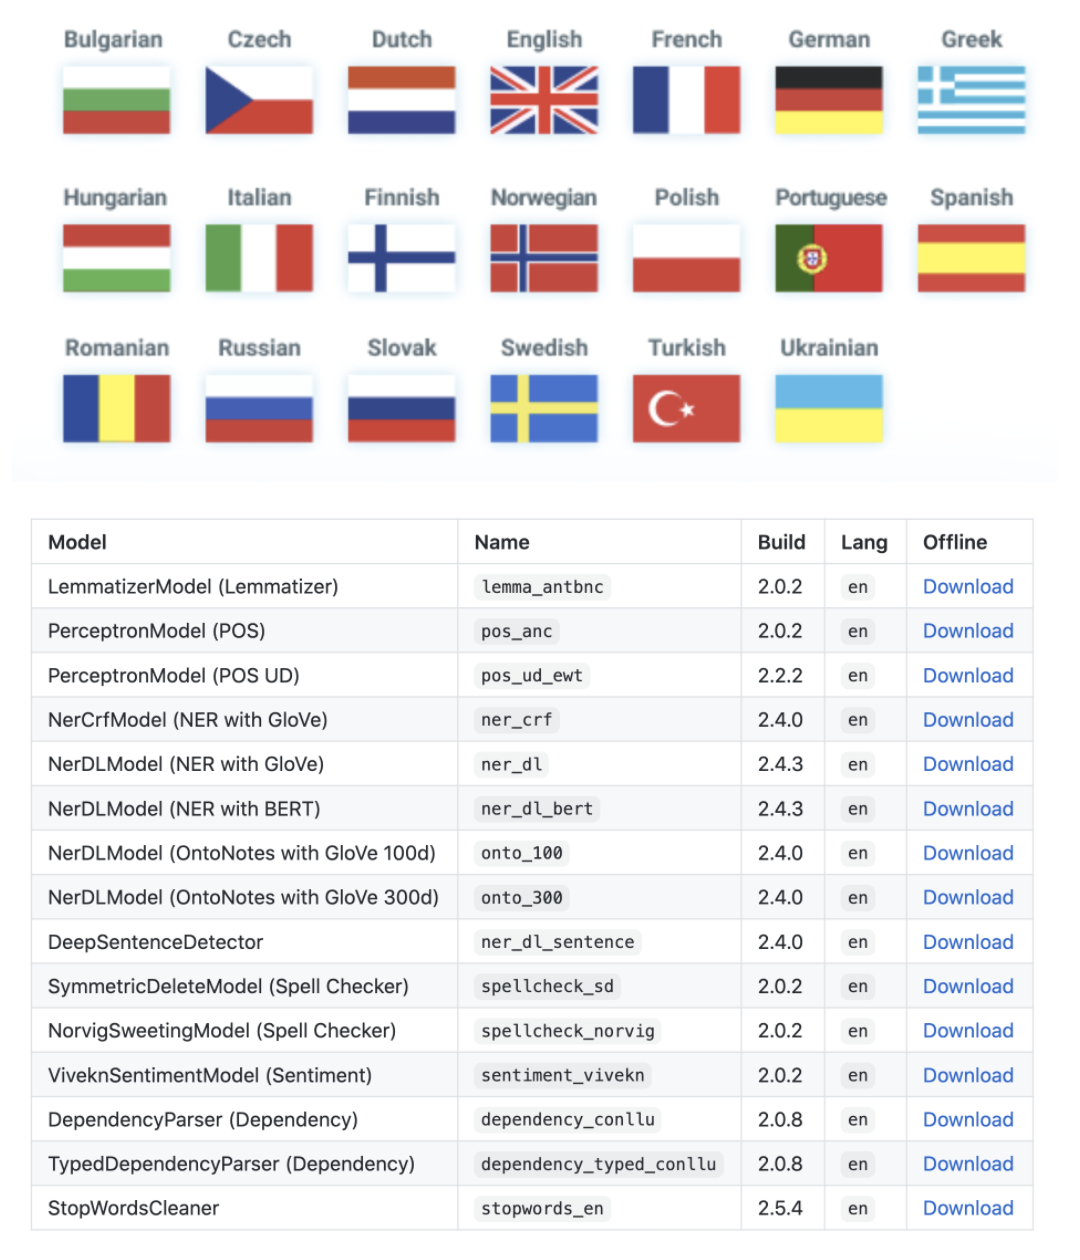

for a more detailed notebook, see https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Public/3.SparkNLP_Pretrained_Models.ipynb

### LemmatizerModel and ContextSpellCheckerModel

In [ ]:
documentAssembler = DocumentAssembler()\
.setInputCol("text")\
.setOutputCol("document")

tokenizer = Tokenizer() \
    .setInputCols(["document"]) \
    .setOutputCol("token")

spellModel = ContextSpellCheckerModel\
    .pretrained('spellcheck_dl')\
    .setInputCols("token")\
    .setOutputCol("checked")

lemmatizer = LemmatizerModel.pretrained('lemma_antbnc', 'en') \
    .setInputCols(["checked"]) \
    .setOutputCol("lemma")

pipeline = Pipeline(
    stages = [
    documentAssembler,
    tokenizer,
    spellModel,
    lemmatizer
  ])

empty_ds = spark.createDataFrame([[""]]).toDF("text")

sc_model = pipeline.fit(empty_ds)

lp = LightPipeline(sc_model)

spellcheck_dl download started this may take some time.
Approximate size to download 112 MB
[OK!]
lemma_antbnc download started this may take some time.
Approximate size to download 907.6 KB
[OK!]


In [ ]:
result = lp.annotate("Plaese alliow me tao introdduce myhelf, I am a man of waelth und tiaste and he just knows that")

list(zip(result['token'],result['checked'],result['lemma']))

[('Plaese', 'Please', 'Please'),
 ('alliow', 'allow', 'allow'),
 ('me', 'me', 'i'),
 ('tao', 'to', 'to'),
 ('introdduce', 'introduce', 'introduce'),
 ('myhelf', 'myself', 'myself'),
 (',', ',', ','),
 ('I', 'I', 'I'),
 ('am', 'am', 'be'),
 ('a', 'a', 'a'),
 ('man', 'man', 'man'),
 ('of', 'of', 'of'),
 ('waelth', 'wealth', 'wealth'),
 ('und', 'and', 'and'),
 ('tiaste', 'taste', 'taste'),
 ('and', 'and', 'and'),
 ('he', 'he', 'he'),
 ('just', 'just', 'just'),
 ('knows', 'knows', 'know'),
 ('that', 'that', 'that')]

### Word and Sentence Embeddings

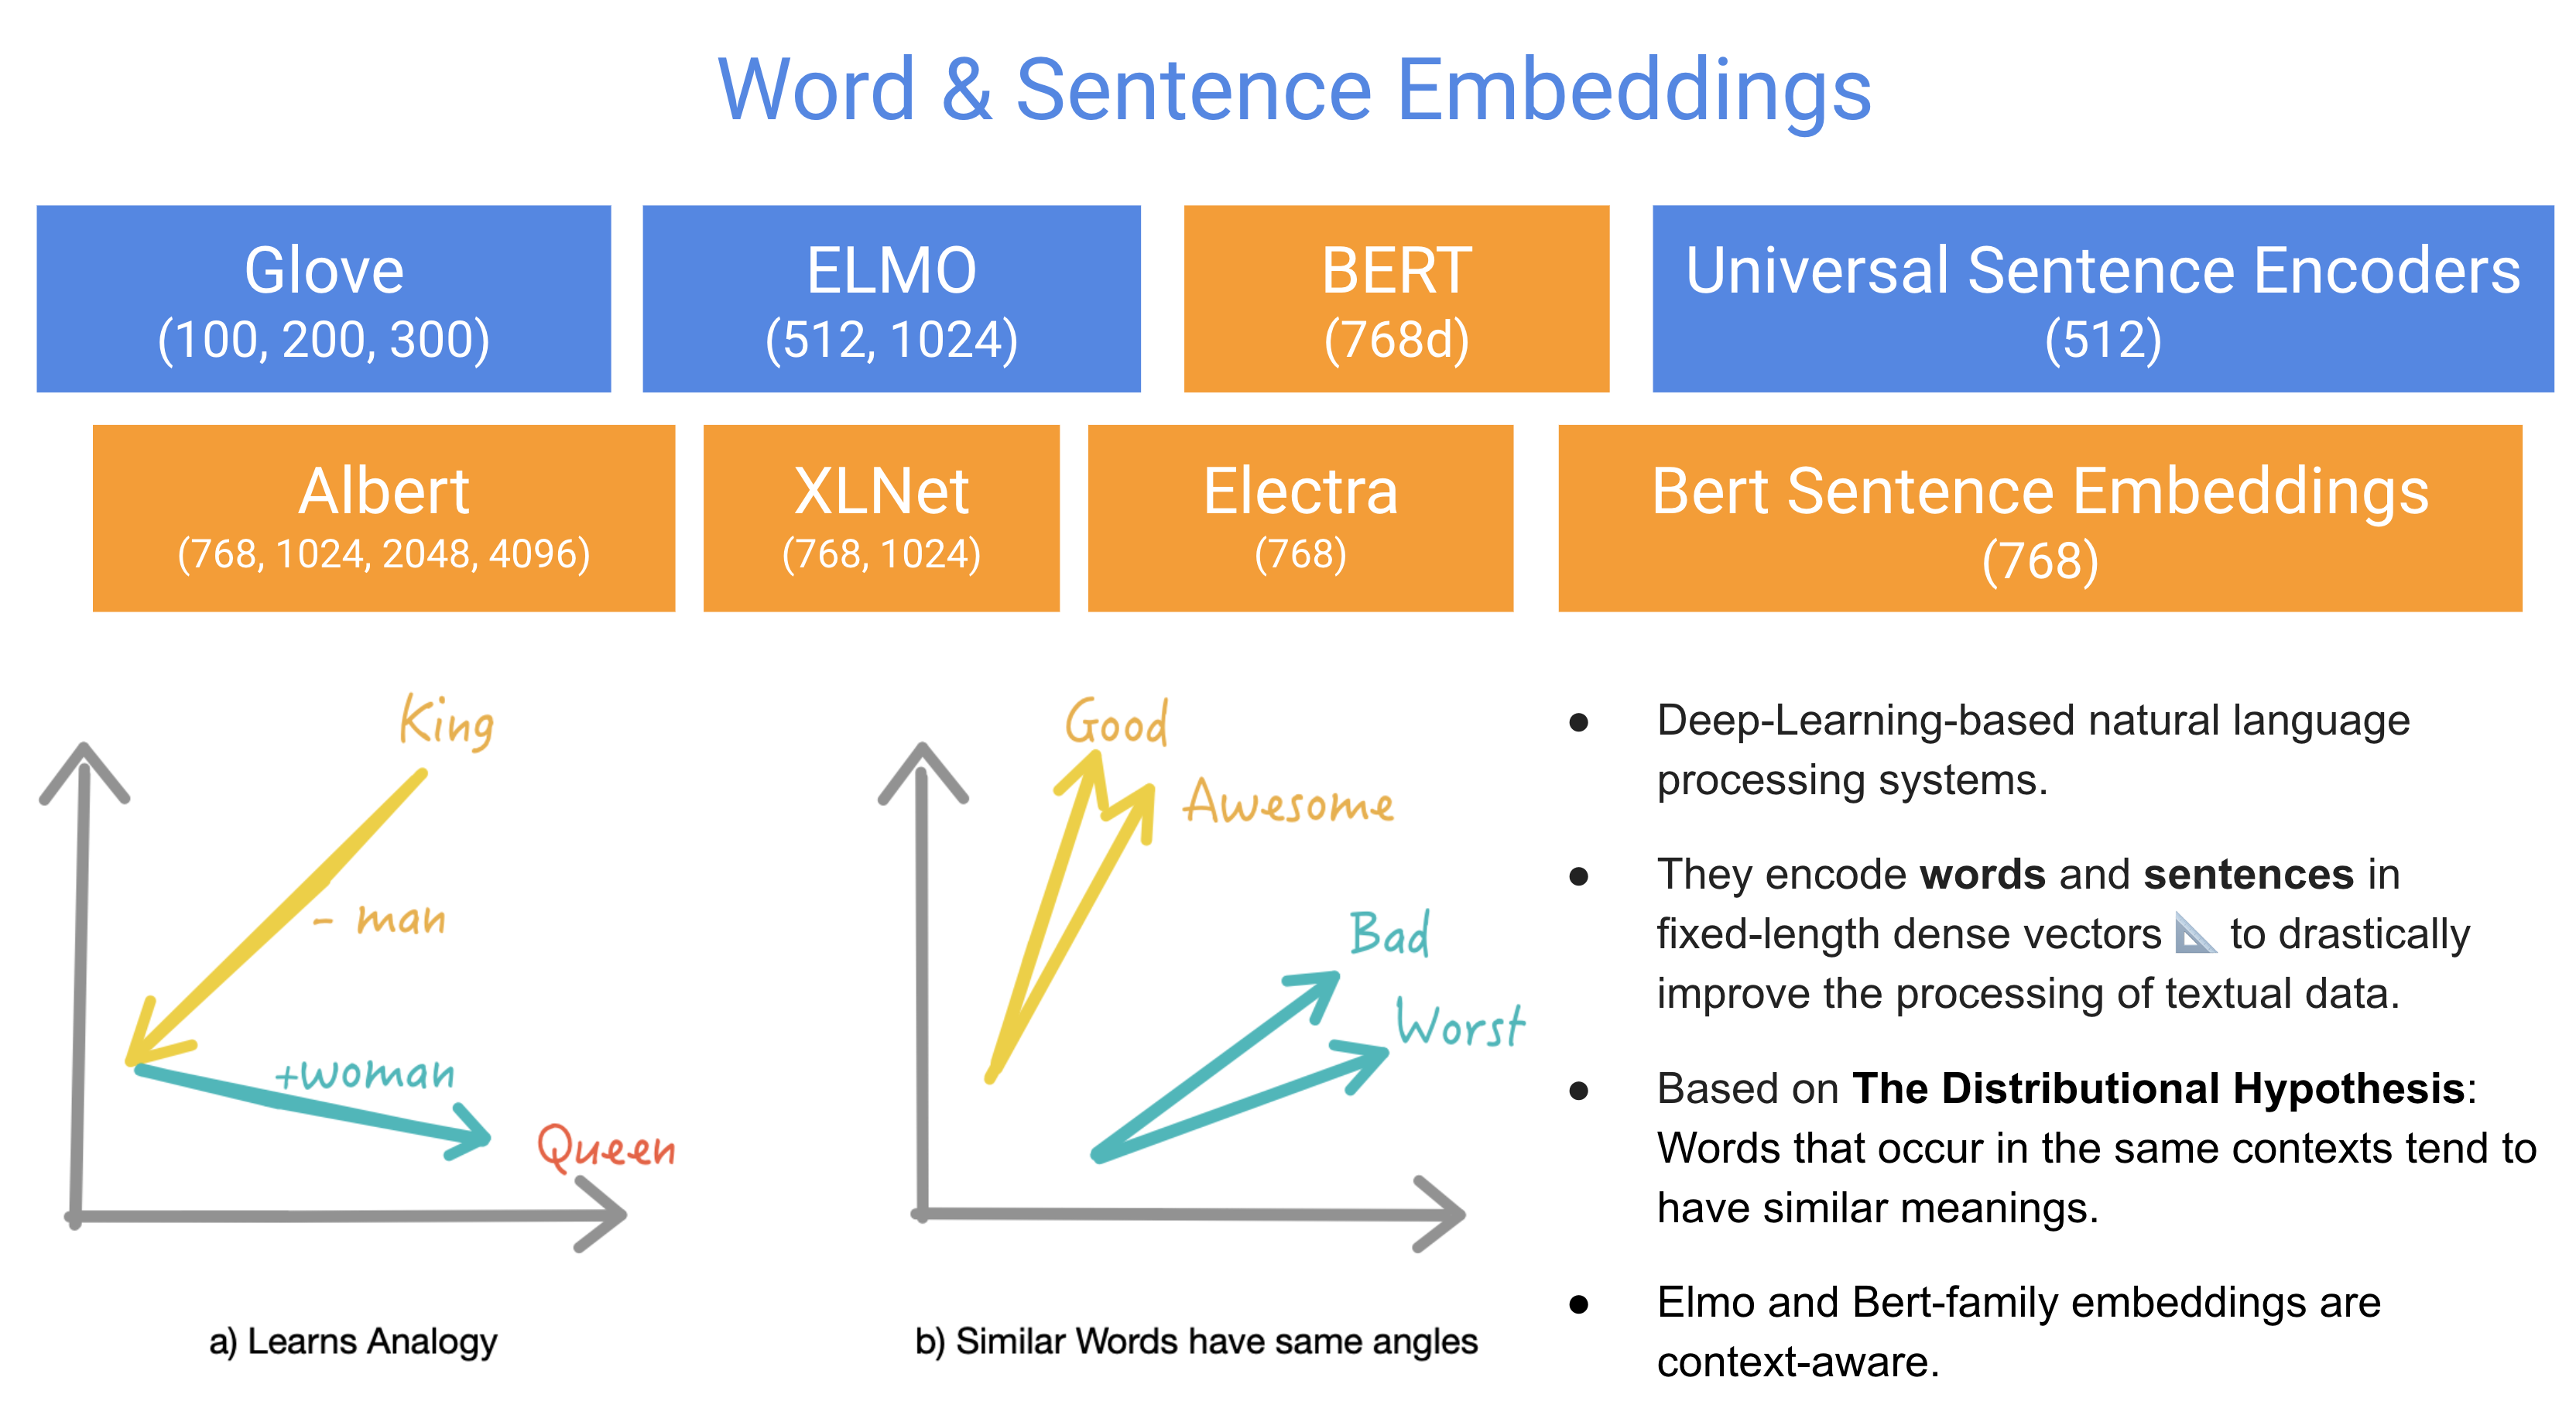

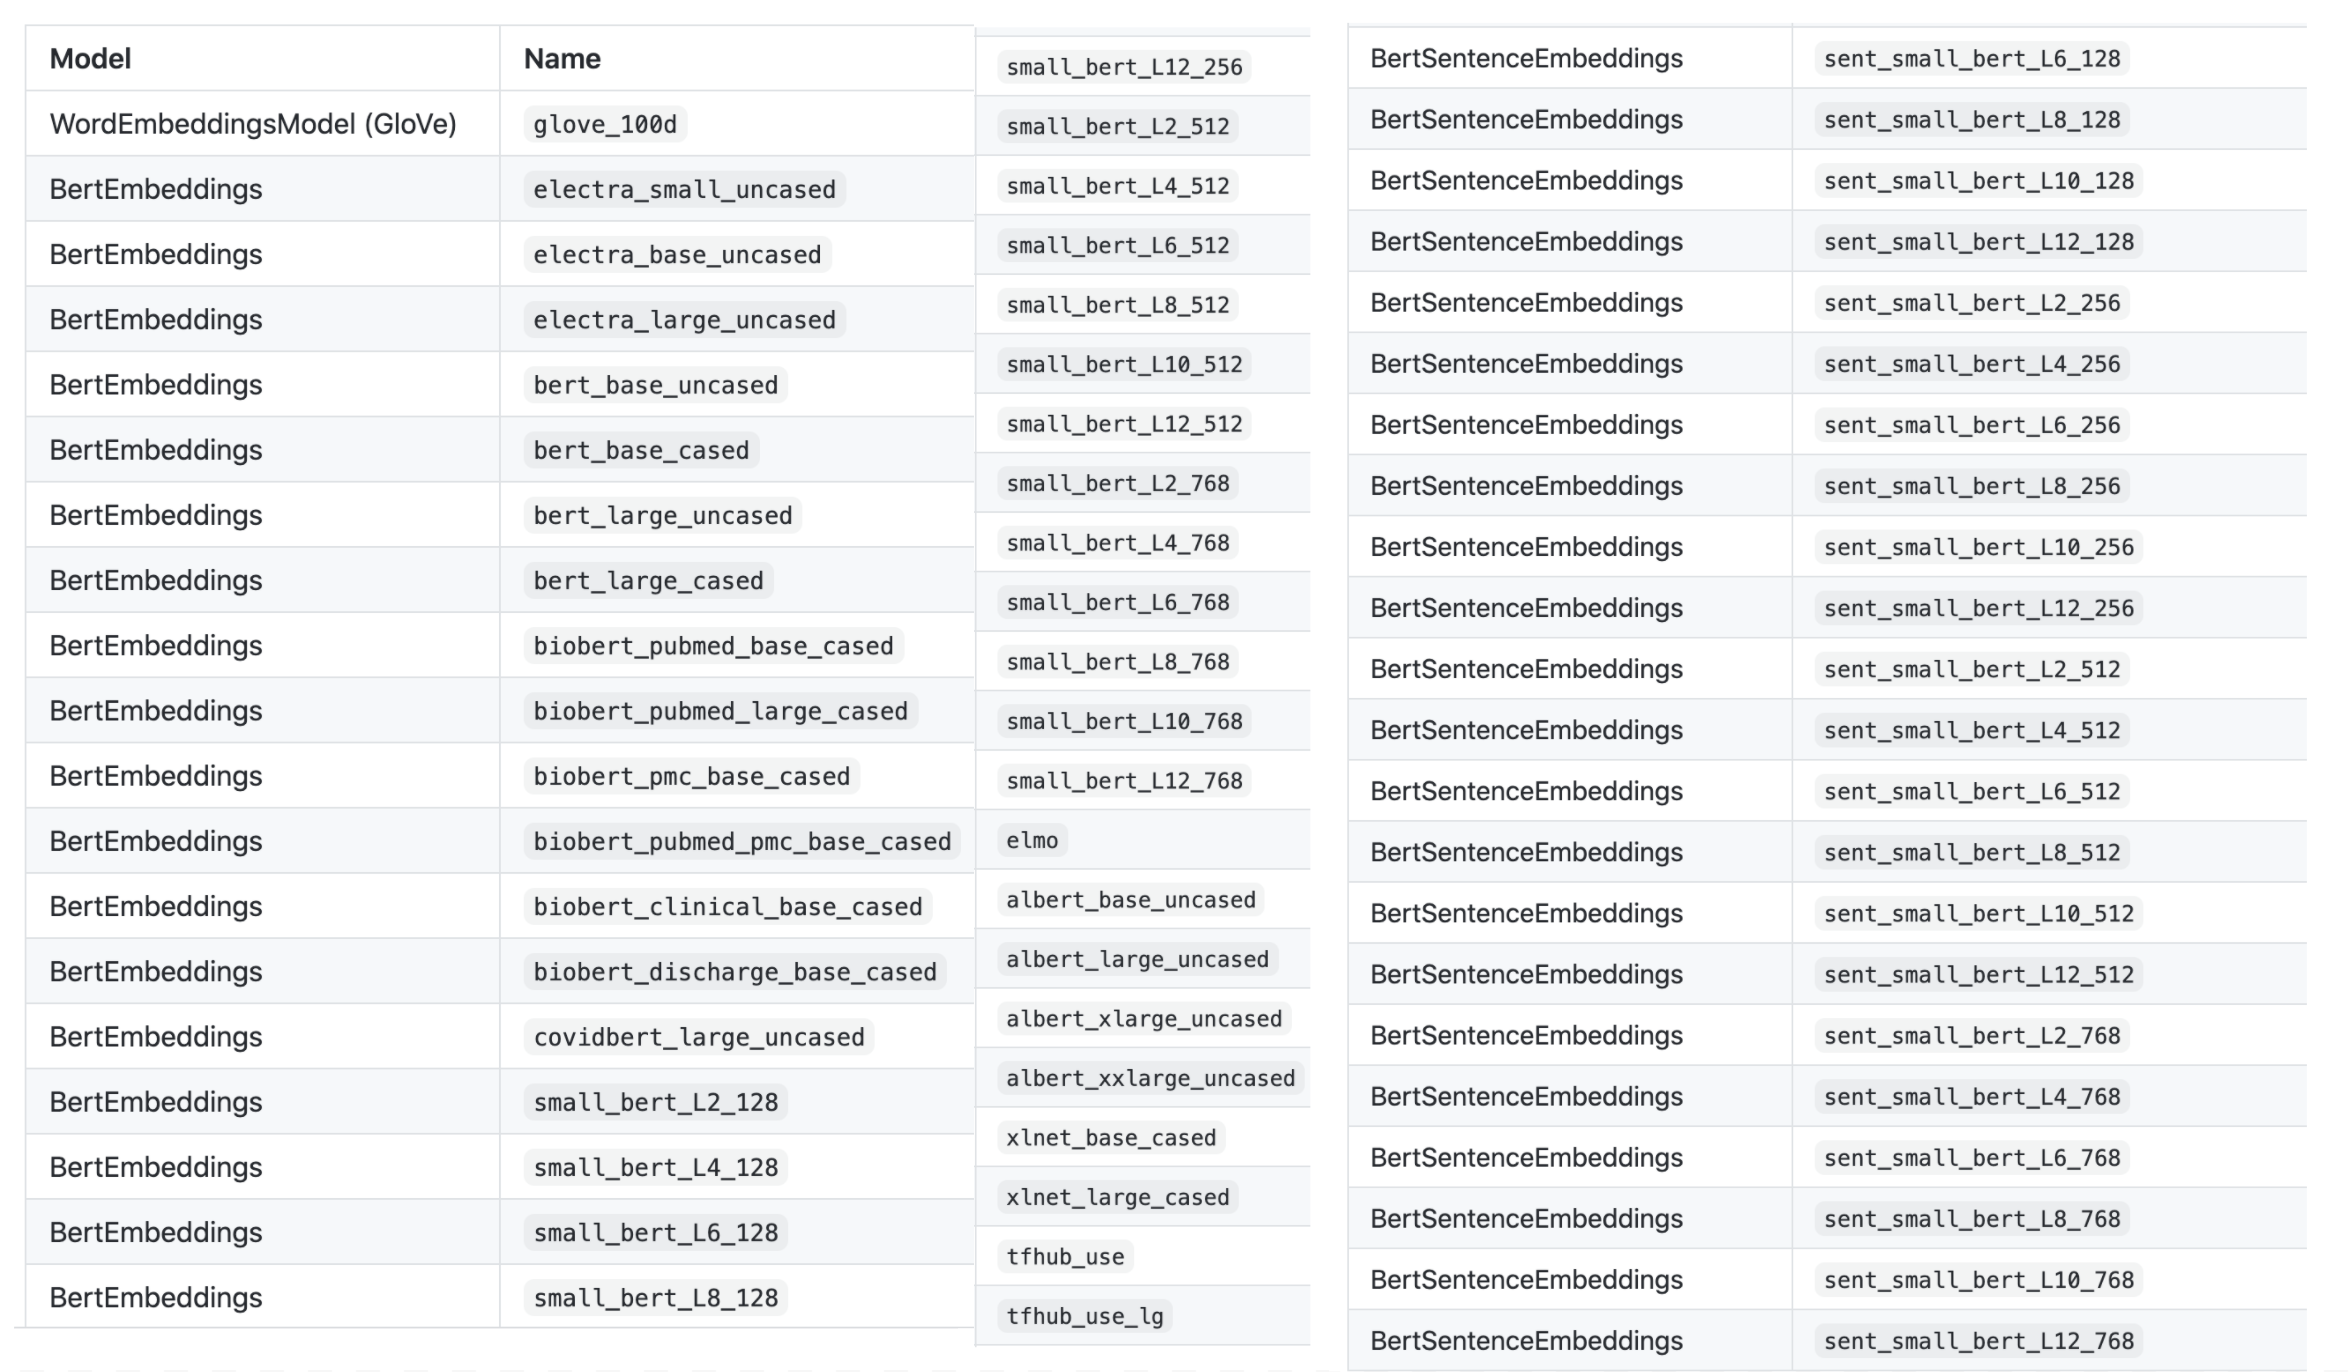

#### Word Embeddings

In [ ]:
! wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Public/data/news_category_train.csv

news_df = spark.read \
      .option("header", True) \
      .csv("news_category_train.csv")


In [ ]:
glove_embeddings = WordEmbeddingsModel.pretrained('glove_100d')\
          .setInputCols(["document", "token"])\
          .setOutputCol("embeddings")

glove_100d download started this may take some time.
Approximate size to download 145.3 MB
[OK!]


In [ ]:
documentAssembler = DocumentAssembler()\
.setInputCol("description")\
.setOutputCol("document")

tokenizer = Tokenizer() \
    .setInputCols(["document"]) \
    .setOutputCol("token")

nlpPipeline = Pipeline(stages=[
 documentAssembler, 
 tokenizer,
 glove_embeddings
 ])

empty_df = spark.createDataFrame([['']]).toDF("description")

pipelineModel = nlpPipeline.fit(empty_df)

result = pipelineModel.transform(news_df.limit(1))

output = result.select('token.result','embeddings.embeddings').limit(1).rdd.flatMap(lambda x: x).collect()


In [ ]:
pd.DataFrame({'token':output[0],'embeddings':output[1]})

token                                         embeddings
0       Short  [-0.4308899939060211, -0.023907000198960304, -...
1     sellers  [0.1458200067281723, 0.2753300070762634, -0.20...
2           ,  [-0.10767000168561935, 0.11052999645471573, 0....
3        Wall  [0.21383999288082123, 0.22098000347614288, 0.0...
4    Street's  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
5   dwindling  [-0.5611299872398376, 1.1217999458312988, 0.65...
6        band  [-0.12160000205039978, -0.24347999691963196, 0...
7          of  [-0.15289999544620514, -0.24278999865055084, 0...
8       ultra  [-0.3504500091075897, -0.27733999490737915, 0....
9      cynics  [-0.06557200103998184, 0.45271000266075134, 0....
10          ,  [-0.10767000168561935, 0.11052999645471573, 0....
11        are  [-0.5153300166130066, 0.8318600058555603, 0.22...
12     seeing  [0.22673000395298004, 0.1282999962568283, 0.29...
13      green  [-0.679069995880127, 0.34907999634742737, -0.2...
14      again  [0.0938429981470108, -0.2028300017118454, 0.34...
15          .  [-0.3397899866104126, 0.20940999686717987, 0.4...

In [ ]:
result = pipelineModel.transform(news_df.limit(10))

result_df = result.select(F.explode(F.arrays_zip('token.result', 'embeddings.embeddings')).alias("cols")) \
.select(F.expr("cols['0']").alias("token"),
        F.expr("cols['1']").alias("embeddings"))

result_df.show(10, truncate=100)

+---------+----------------------------------------------------------------------------------------------------+
|    token|                                                                                          embeddings|
+---------+----------------------------------------------------------------------------------------------------+
|    Short|[-0.43089, -0.023907, -0.081875, 0.044522, 0.33741, -0.23081, -0.35145, 0.33043, -0.92222, -0.220...|
|  sellers|[0.14582, 0.27533, -0.20703, -0.30671, 0.54408, -0.18303, -0.38876, -0.52166, 0.3569, -1.085, 0.1...|
|        ,|[-0.10767, 0.11053, 0.59812, -0.54361, 0.67396, 0.10663, 0.038867, 0.35481, 0.06351, -0.094189, 0...|
|     Wall|[0.21384, 0.22098, 0.037105, -0.29186, -0.030131, -0.16247, -1.1043, -0.88436, -0.078059, -0.6353...|
| Street's|[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...|
|dwindling|[-0.56113, 1.1218, 0.65823, 0.2699, 0.12404, -0.12759, -1.0287, -0.64777, 0.59677, -0

#### Bert Embeddings

In [ ]:
bert_embeddings = BertEmbeddings.pretrained('bert_base_cased')\
          .setInputCols(["document", "token"])\
          .setOutputCol("embeddings")\


bert_base_cased download started this may take some time.
Approximate size to download 389.1 MB
[OK!]


In [ ]:
 documentAssembler = DocumentAssembler()\
.setInputCol("description")\
.setOutputCol("document")

tokenizer = Tokenizer() \
    .setInputCols(["document"]) \
    .setOutputCol("token")

 
nlpPipeline = Pipeline(stages=[
 documentAssembler, 
 tokenizer,
 bert_embeddings
 ])

empty_df = spark.createDataFrame([['']]).toDF("description")

pipelineModel = nlpPipeline.fit(empty_df)

result = pipelineModel.transform(news_df.limit(10))

result_df = result.select(F.explode(F.arrays_zip('token.result', 'embeddings.embeddings')).alias("cols")) \
.select(F.expr("cols['0']").alias("token"),
        F.expr("cols['1']").alias("bert_embeddings"))

result_df.show(truncate=100)

+----------+----------------------------------------------------------------------------------------------------+
|     token|                                                                                     bert_embeddings|
+----------+----------------------------------------------------------------------------------------------------+
|     Short|[0.49818462, -0.33318496, 0.45259988, -0.2974756, -0.3754371, 0.31528366, 0.2750385, -0.078503564...|
|   sellers|[0.30120662, 0.60389113, 0.043556914, -0.083133996, 0.15532504, 0.197381, 0.32395986, 0.2538231, ...|
|         ,|[-0.060416616, 0.1664043, -0.13490184, 0.14198649, -0.022981878, 0.021920728, 0.5455168, 0.437101...|
|      Wall|[-0.13157858, 0.4383816, -0.38766277, -0.3366968, 0.14921412, 0.030721495, 0.15543644, -0.0706191...|
|  Street's|[0.35614634, 0.41715232, -0.02247148, -0.18717076, 0.4573127, 0.25098228, 0.2001244, 0.35114032, ...|
| dwindling|[0.5994899, -0.11001089, -0.19151835, -0.4137226, 0.40886638, -0.40101174, 0

#### Bert Sentence Embeddings

In [ ]:
bert_sentence_embeddings = BertSentenceEmbeddings.pretrained('sent_small_bert_L6_128')\
          .setInputCols(["document"])\
          .setOutputCol("bert_sent_embeddings")


nlpPipeline = Pipeline(stages=[
 documentAssembler, 
 bert_sentence_embeddings
 ])


empty_df = spark.createDataFrame([['']]).toDF("description")

pipelineModel = nlpPipeline.fit(empty_df)

result = pipelineModel.transform(news_df.limit(10))

result_df = result.select(F.explode(F.arrays_zip('document.result', 'bert_sent_embeddings.embeddings')).alias("cols")) \
.select(F.expr("cols['0']").alias("document"),
        F.expr("cols['1']").alias("bert_sent_embeddings"))

result_df.show(truncate=100)

sent_small_bert_L6_128 download started this may take some time.
Approximate size to download 19 MB
[OK!]
+----------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------+
|                                                                                            document|                                                                                bert_sent_embeddings|
+----------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------+
|                Short sellers, Wall Street's dwindling band of ultra cynics, are seeing green again.|[-0.41622362, 0.68869215, -0.33006865, 0.4378369, -1.3162695, -1.7992039, 0.76035947, 0.21030752,...|
| Private investment firm Carlyle Group, which has a reputation for making wel

#### Universal Sentence Encoder

In [ ]:
# no need for token columns 
use_embeddings = UniversalSentenceEncoder.pretrained('tfhub_use').\
  setInputCols(["document"]).\
  setOutputCol("sentence_embeddings")

tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]


In [ ]:
nlpPipeline = Pipeline(stages=[
 documentAssembler, 
 use_embeddings
 ])

empty_df = spark.createDataFrame([['']]).toDF("description")

pipelineModel = nlpPipeline.fit(empty_df)

result = pipelineModel.transform(news_df.limit(10))

result_df = result.select(F.explode(F.arrays_zip('document.result', 'sentence_embeddings.embeddings')).alias("cols")) \
.select(F.expr("cols['0']").alias("document"),
        F.expr("cols['1']").alias("USE_embeddings"))

result_df.show(truncate=100)

+----------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------+
|                                                                                            document|                                                                                      USE_embeddings|
+----------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------+
|                Short sellers, Wall Street's dwindling band of ultra cynics, are seeing green again.|[0.04415016, -6.5327797E-4, -0.013665809, -0.0604859, -0.07109088, 0.0486745, 0.084806666, -0.024...|
| Private investment firm Carlyle Group, which has a reputation for making well timed and occasion...|[0.08444516, 0.03535435, -0.039839264, 0.021572135, -0.09528033, 0.06693123, 0.084

### Named Entity Recognition (NER) Models

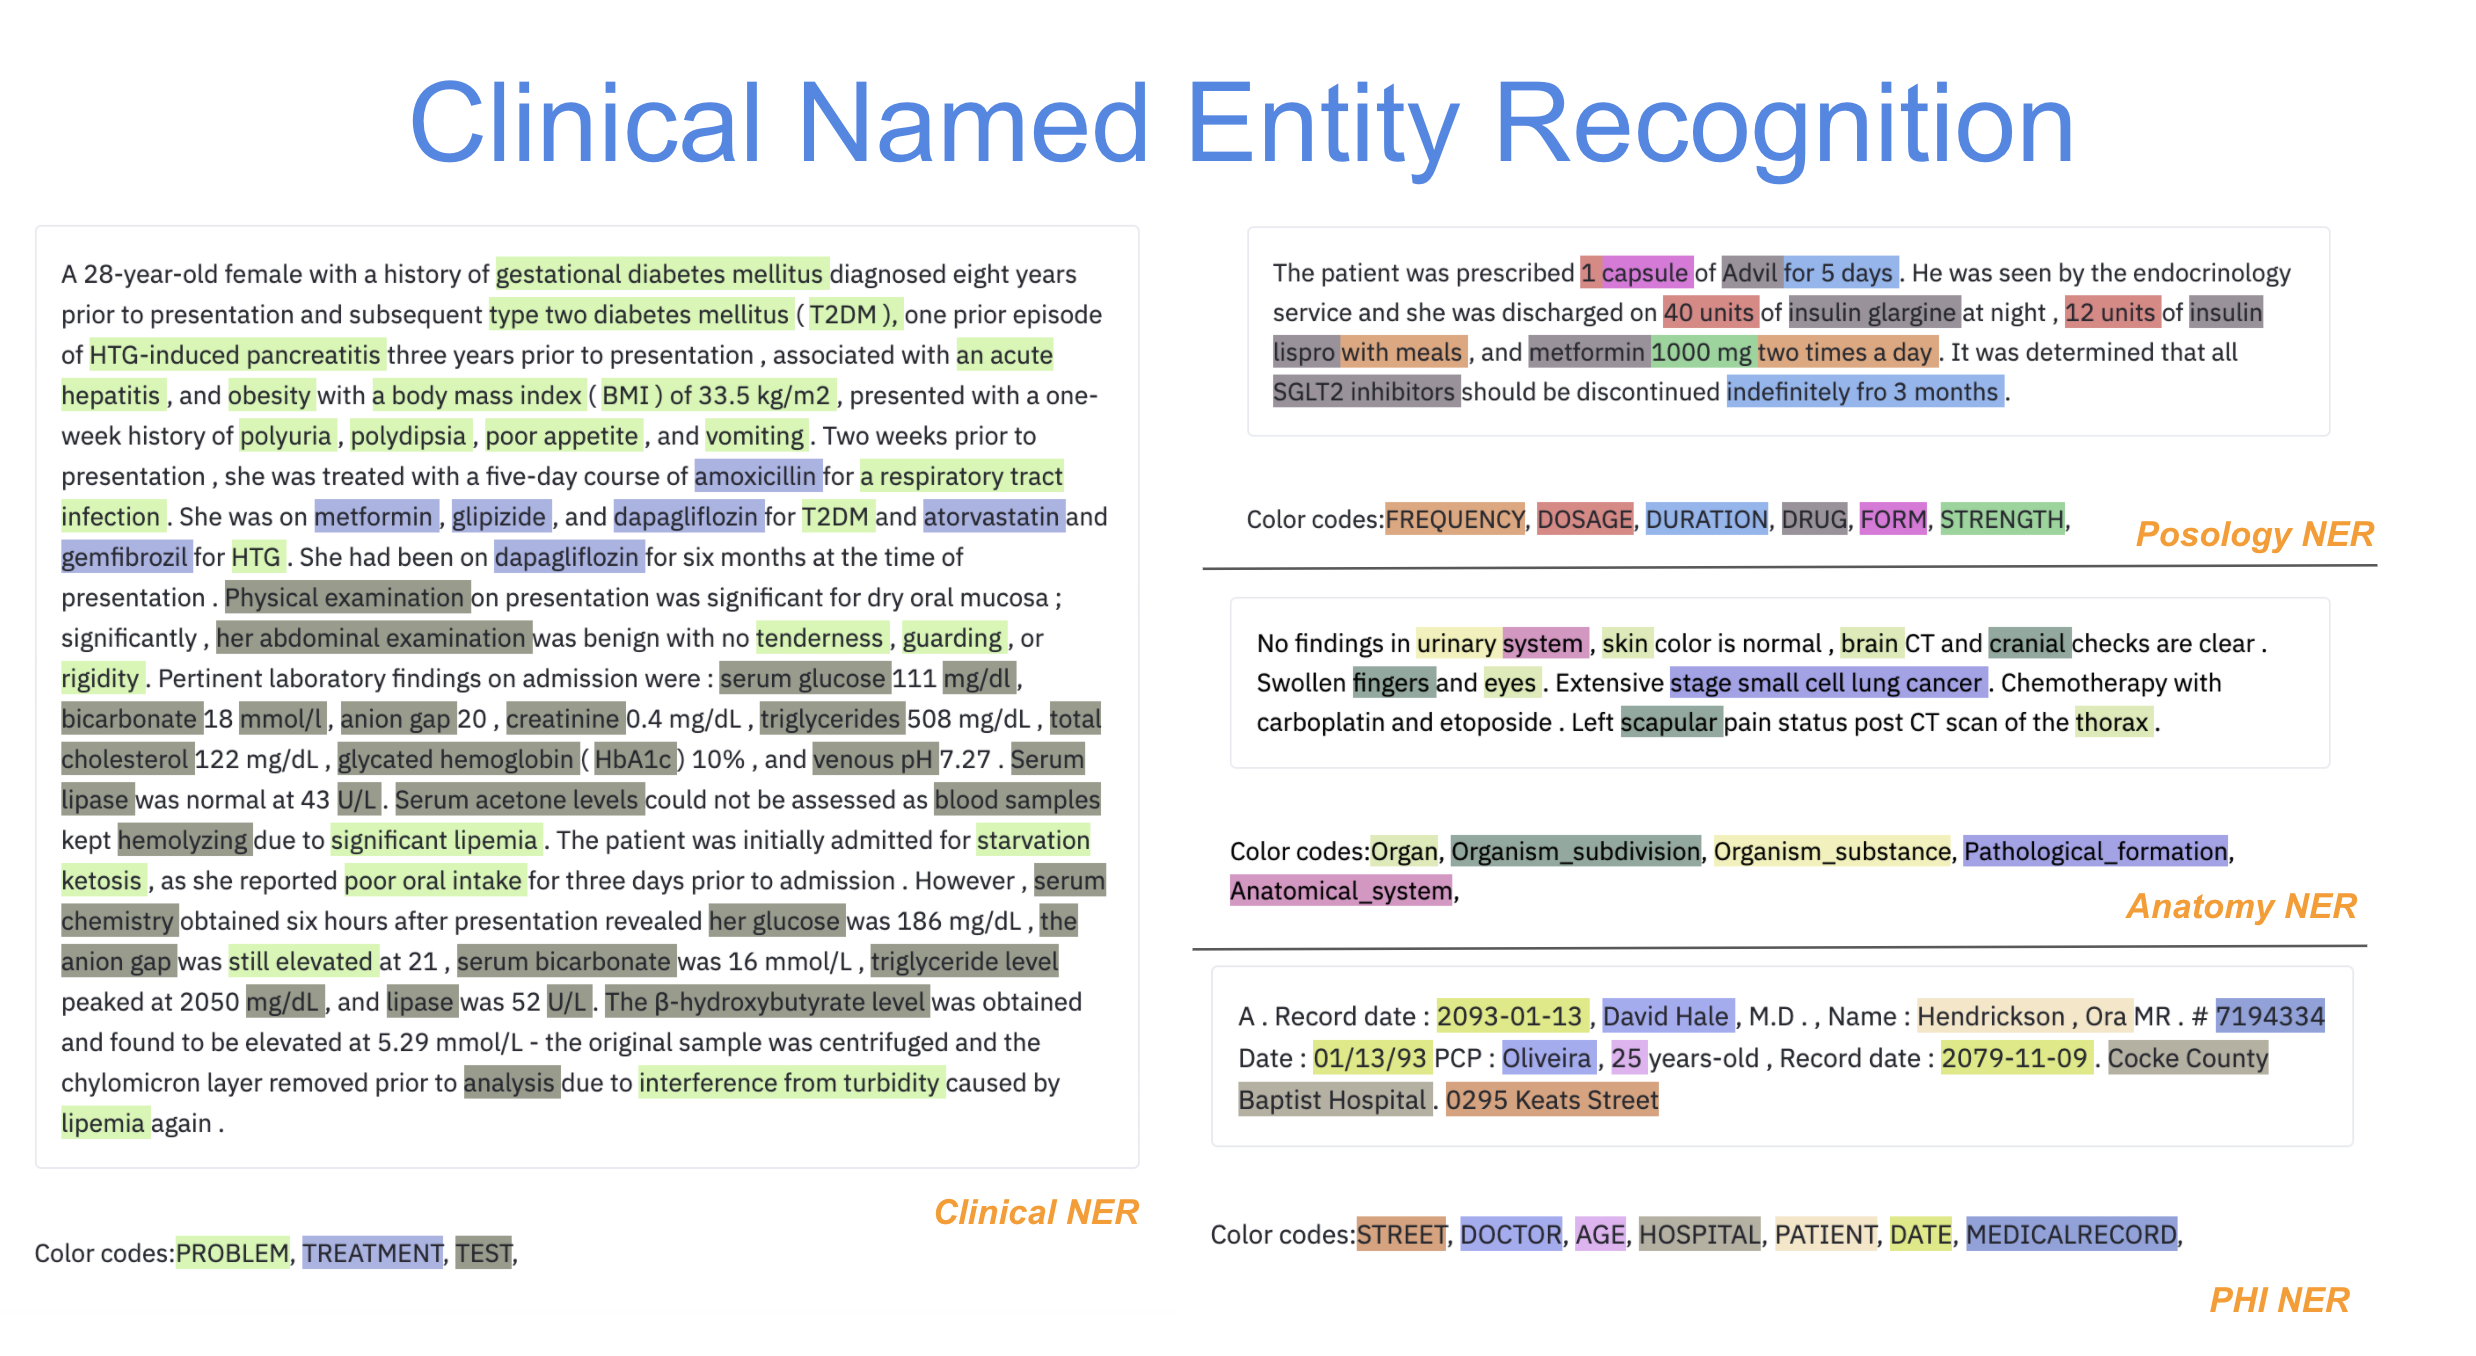

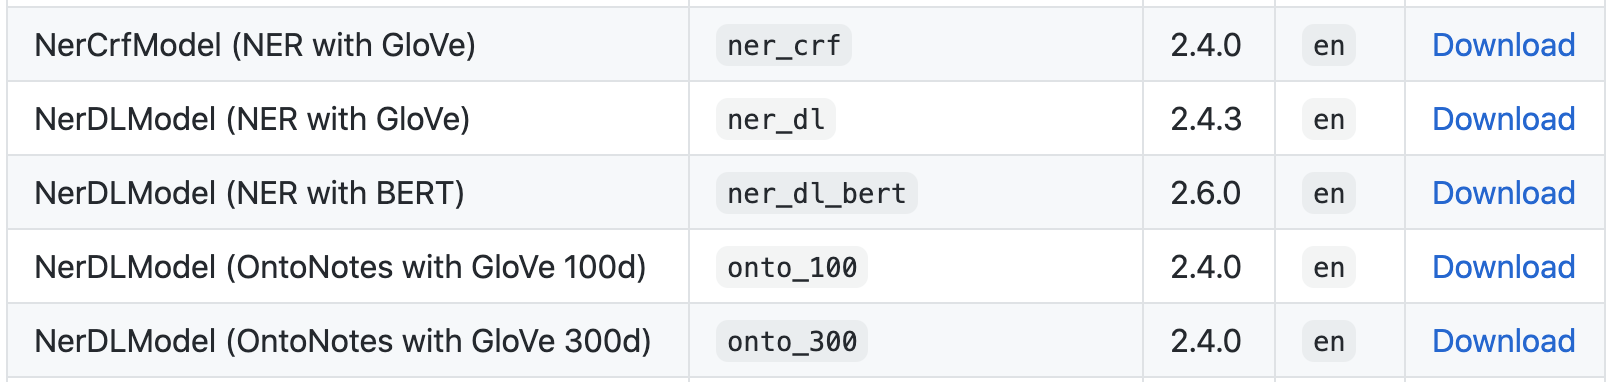

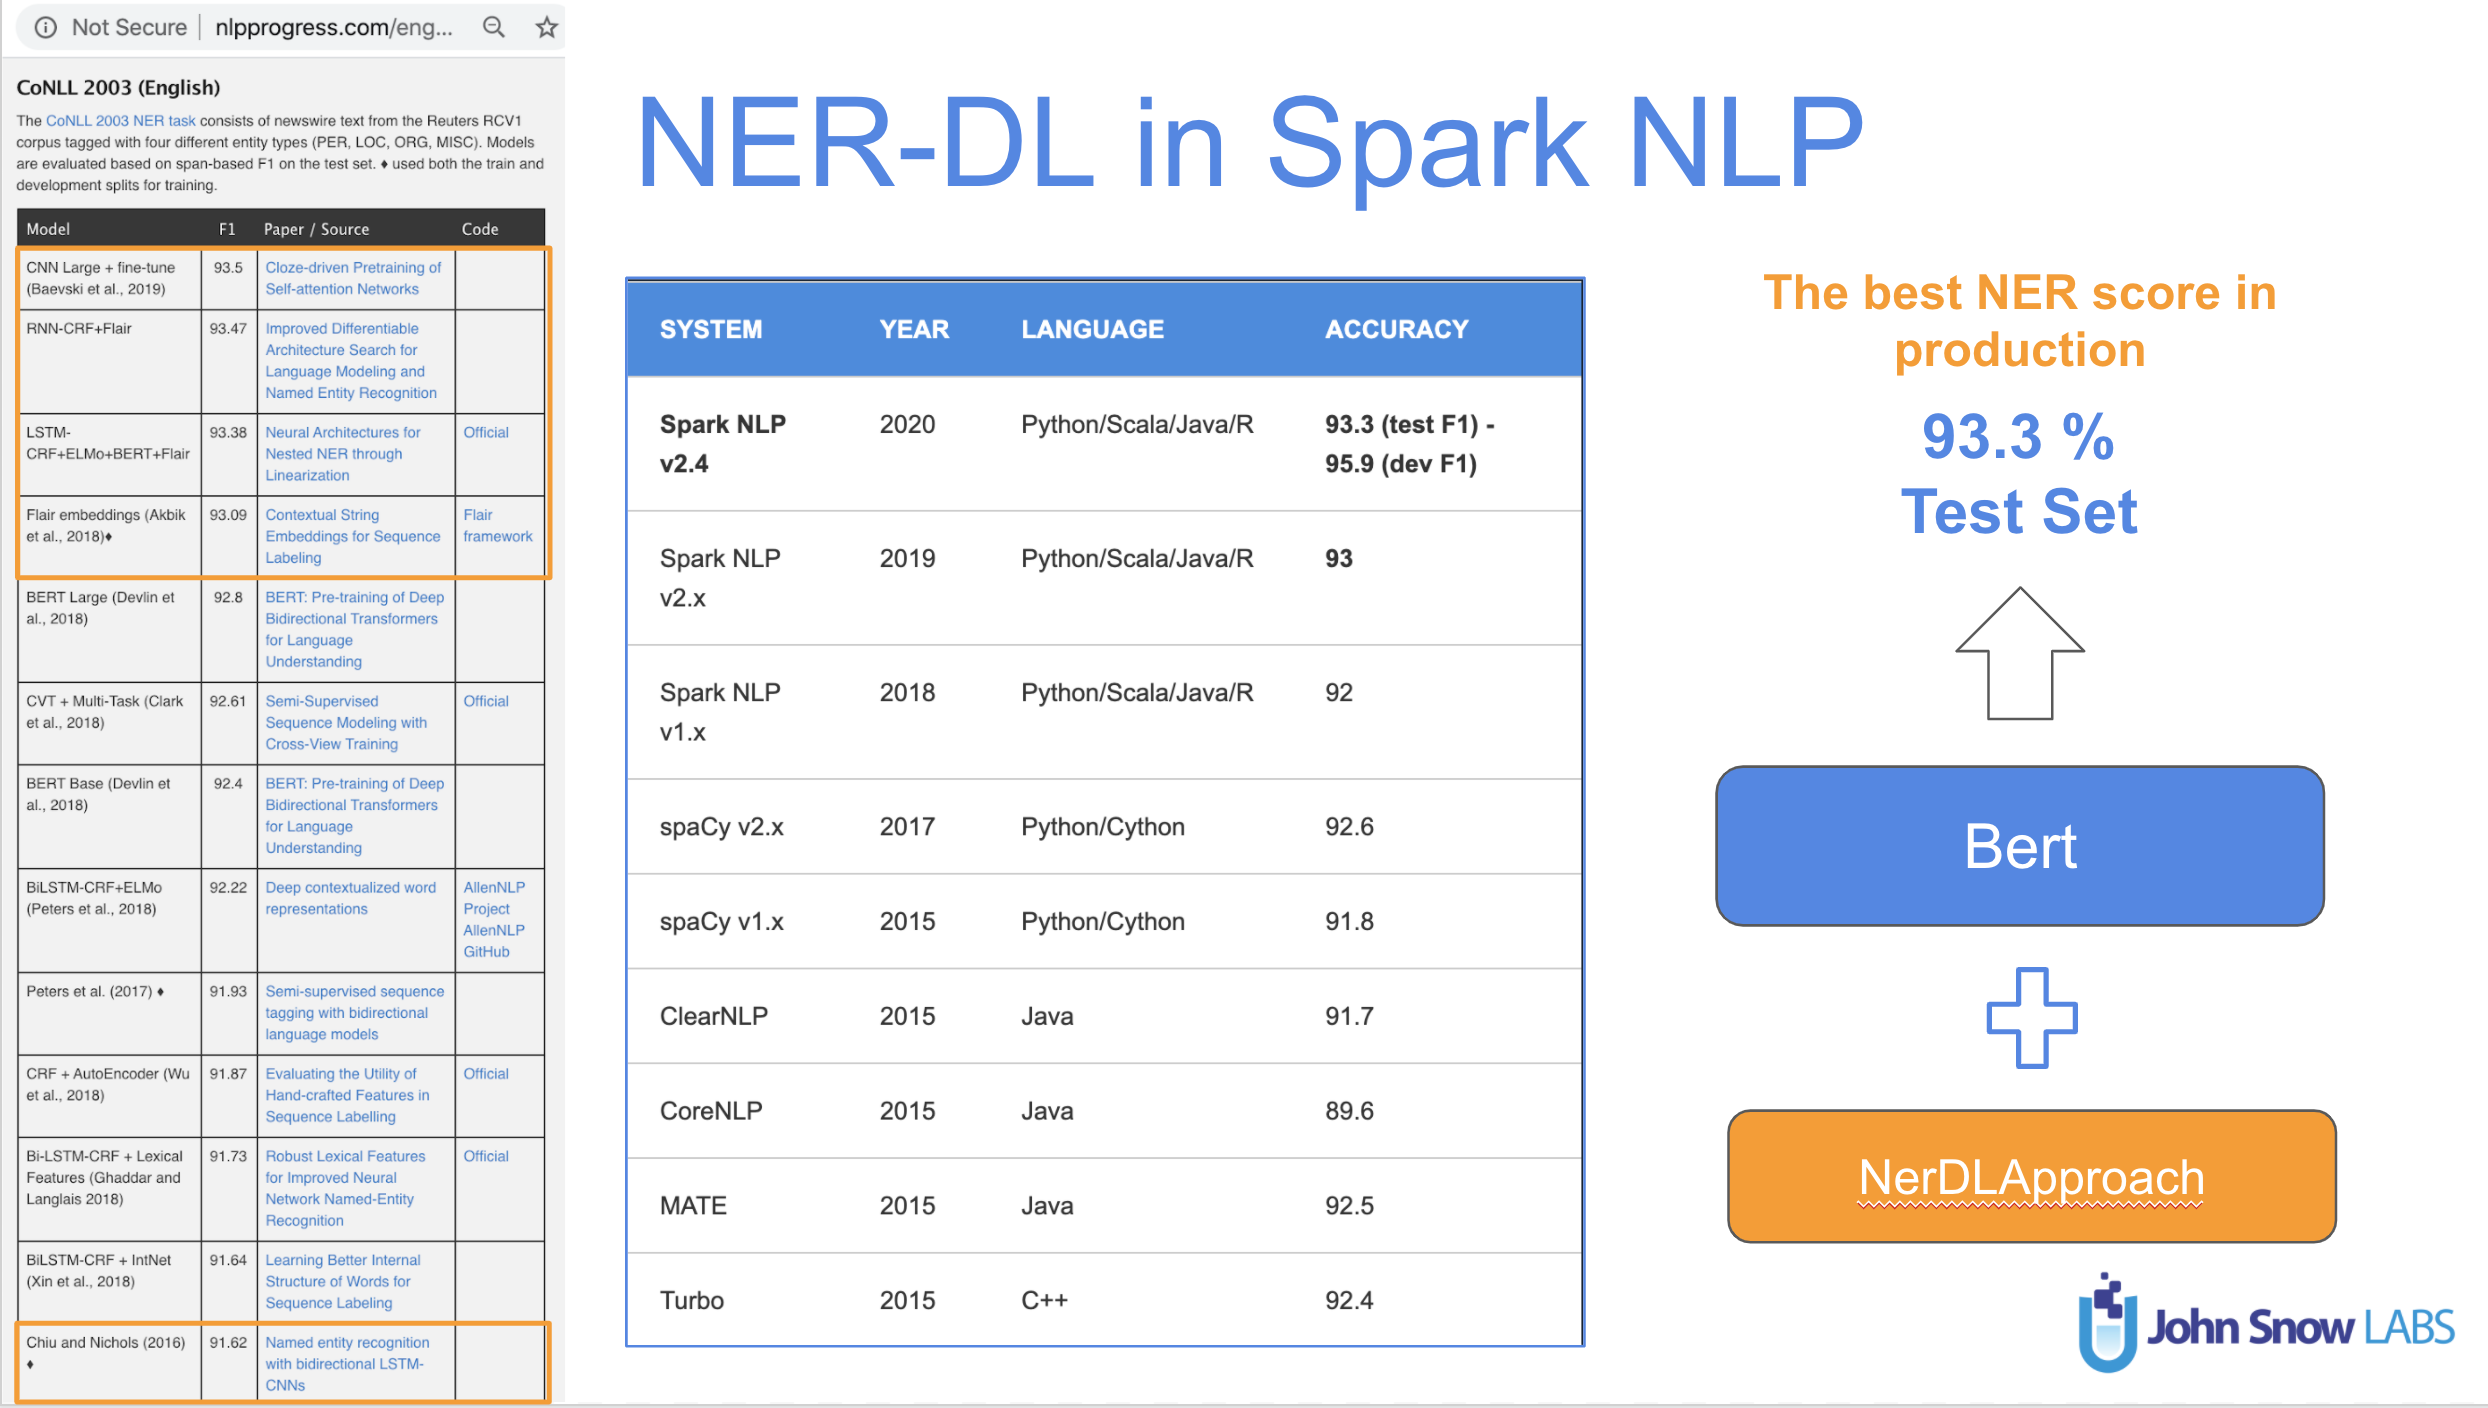

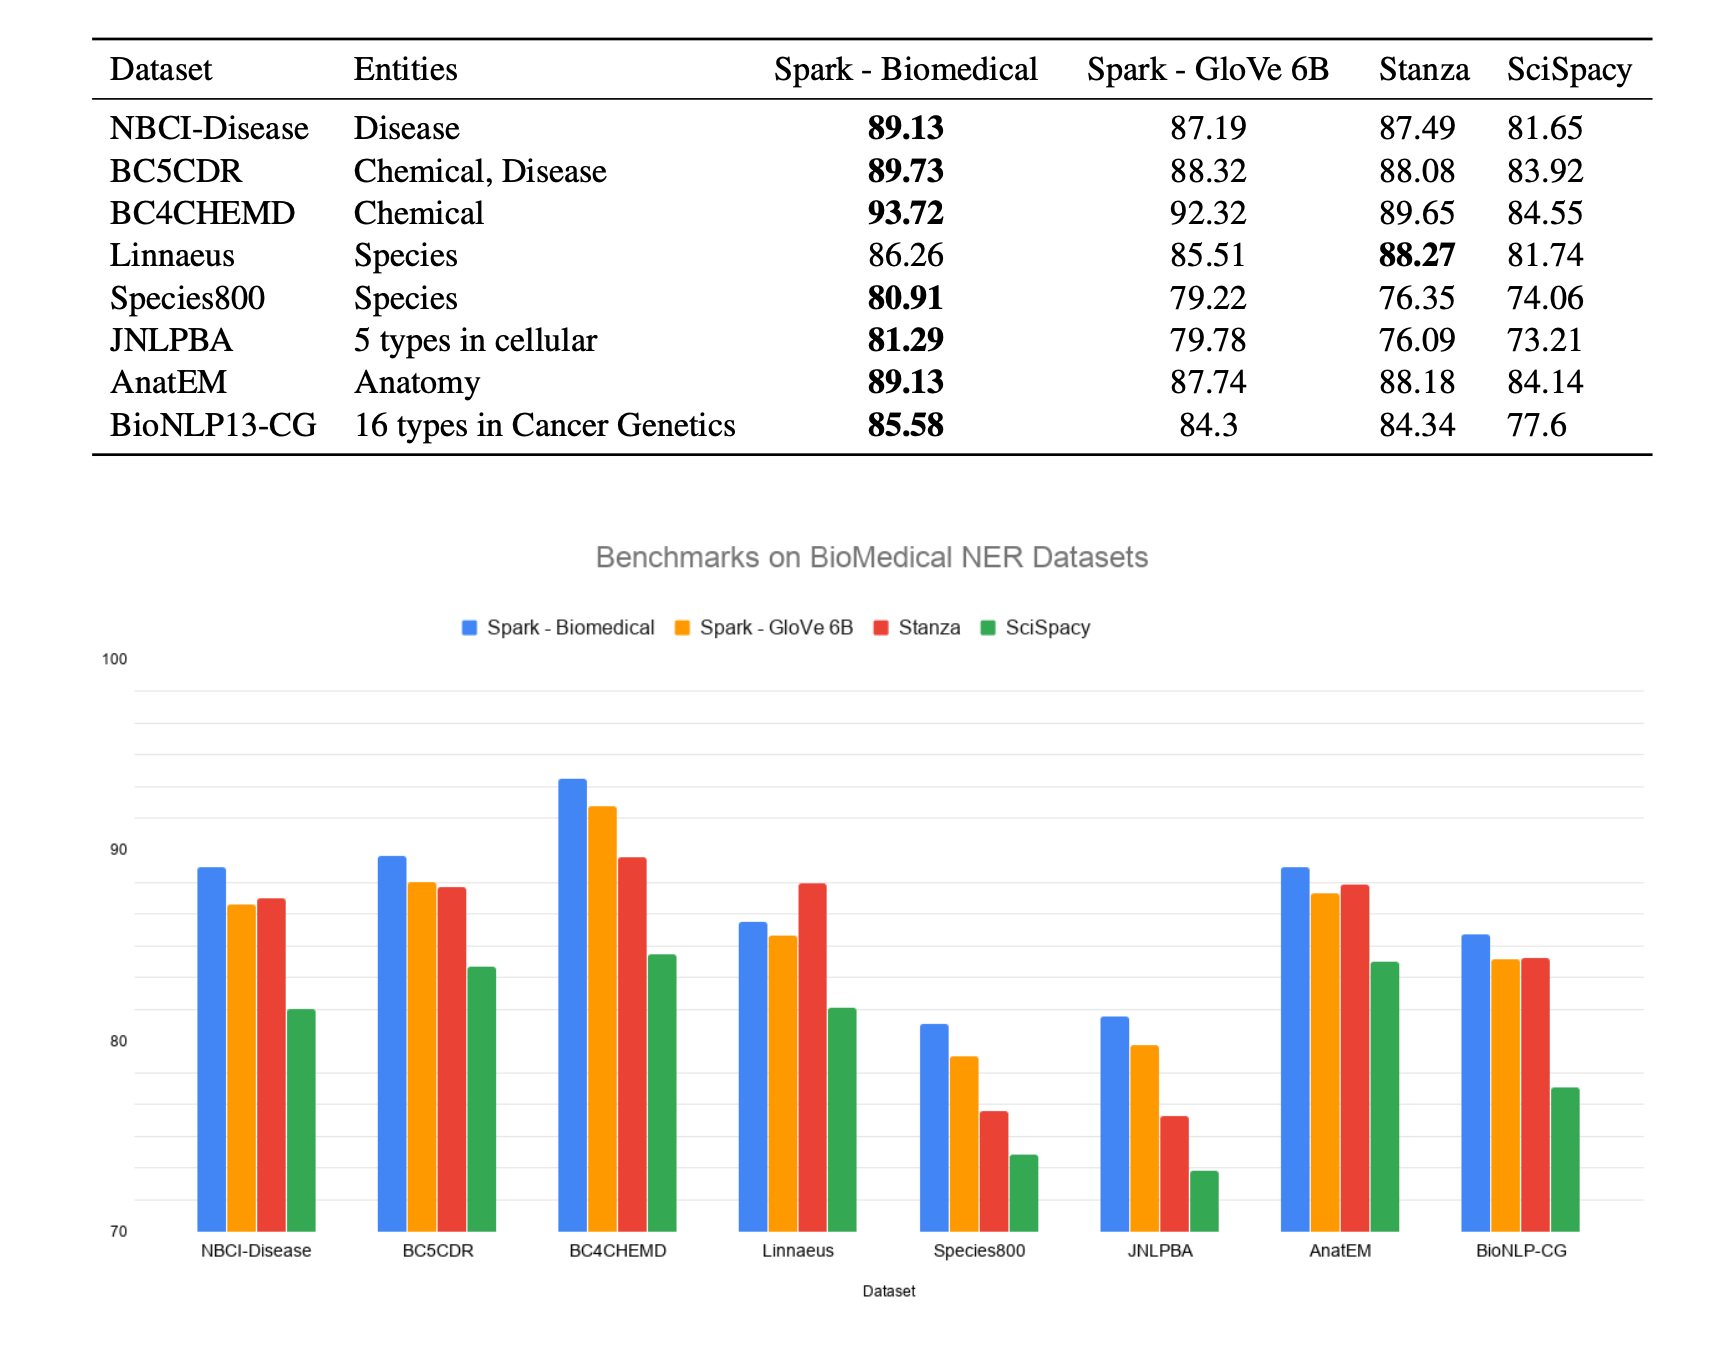

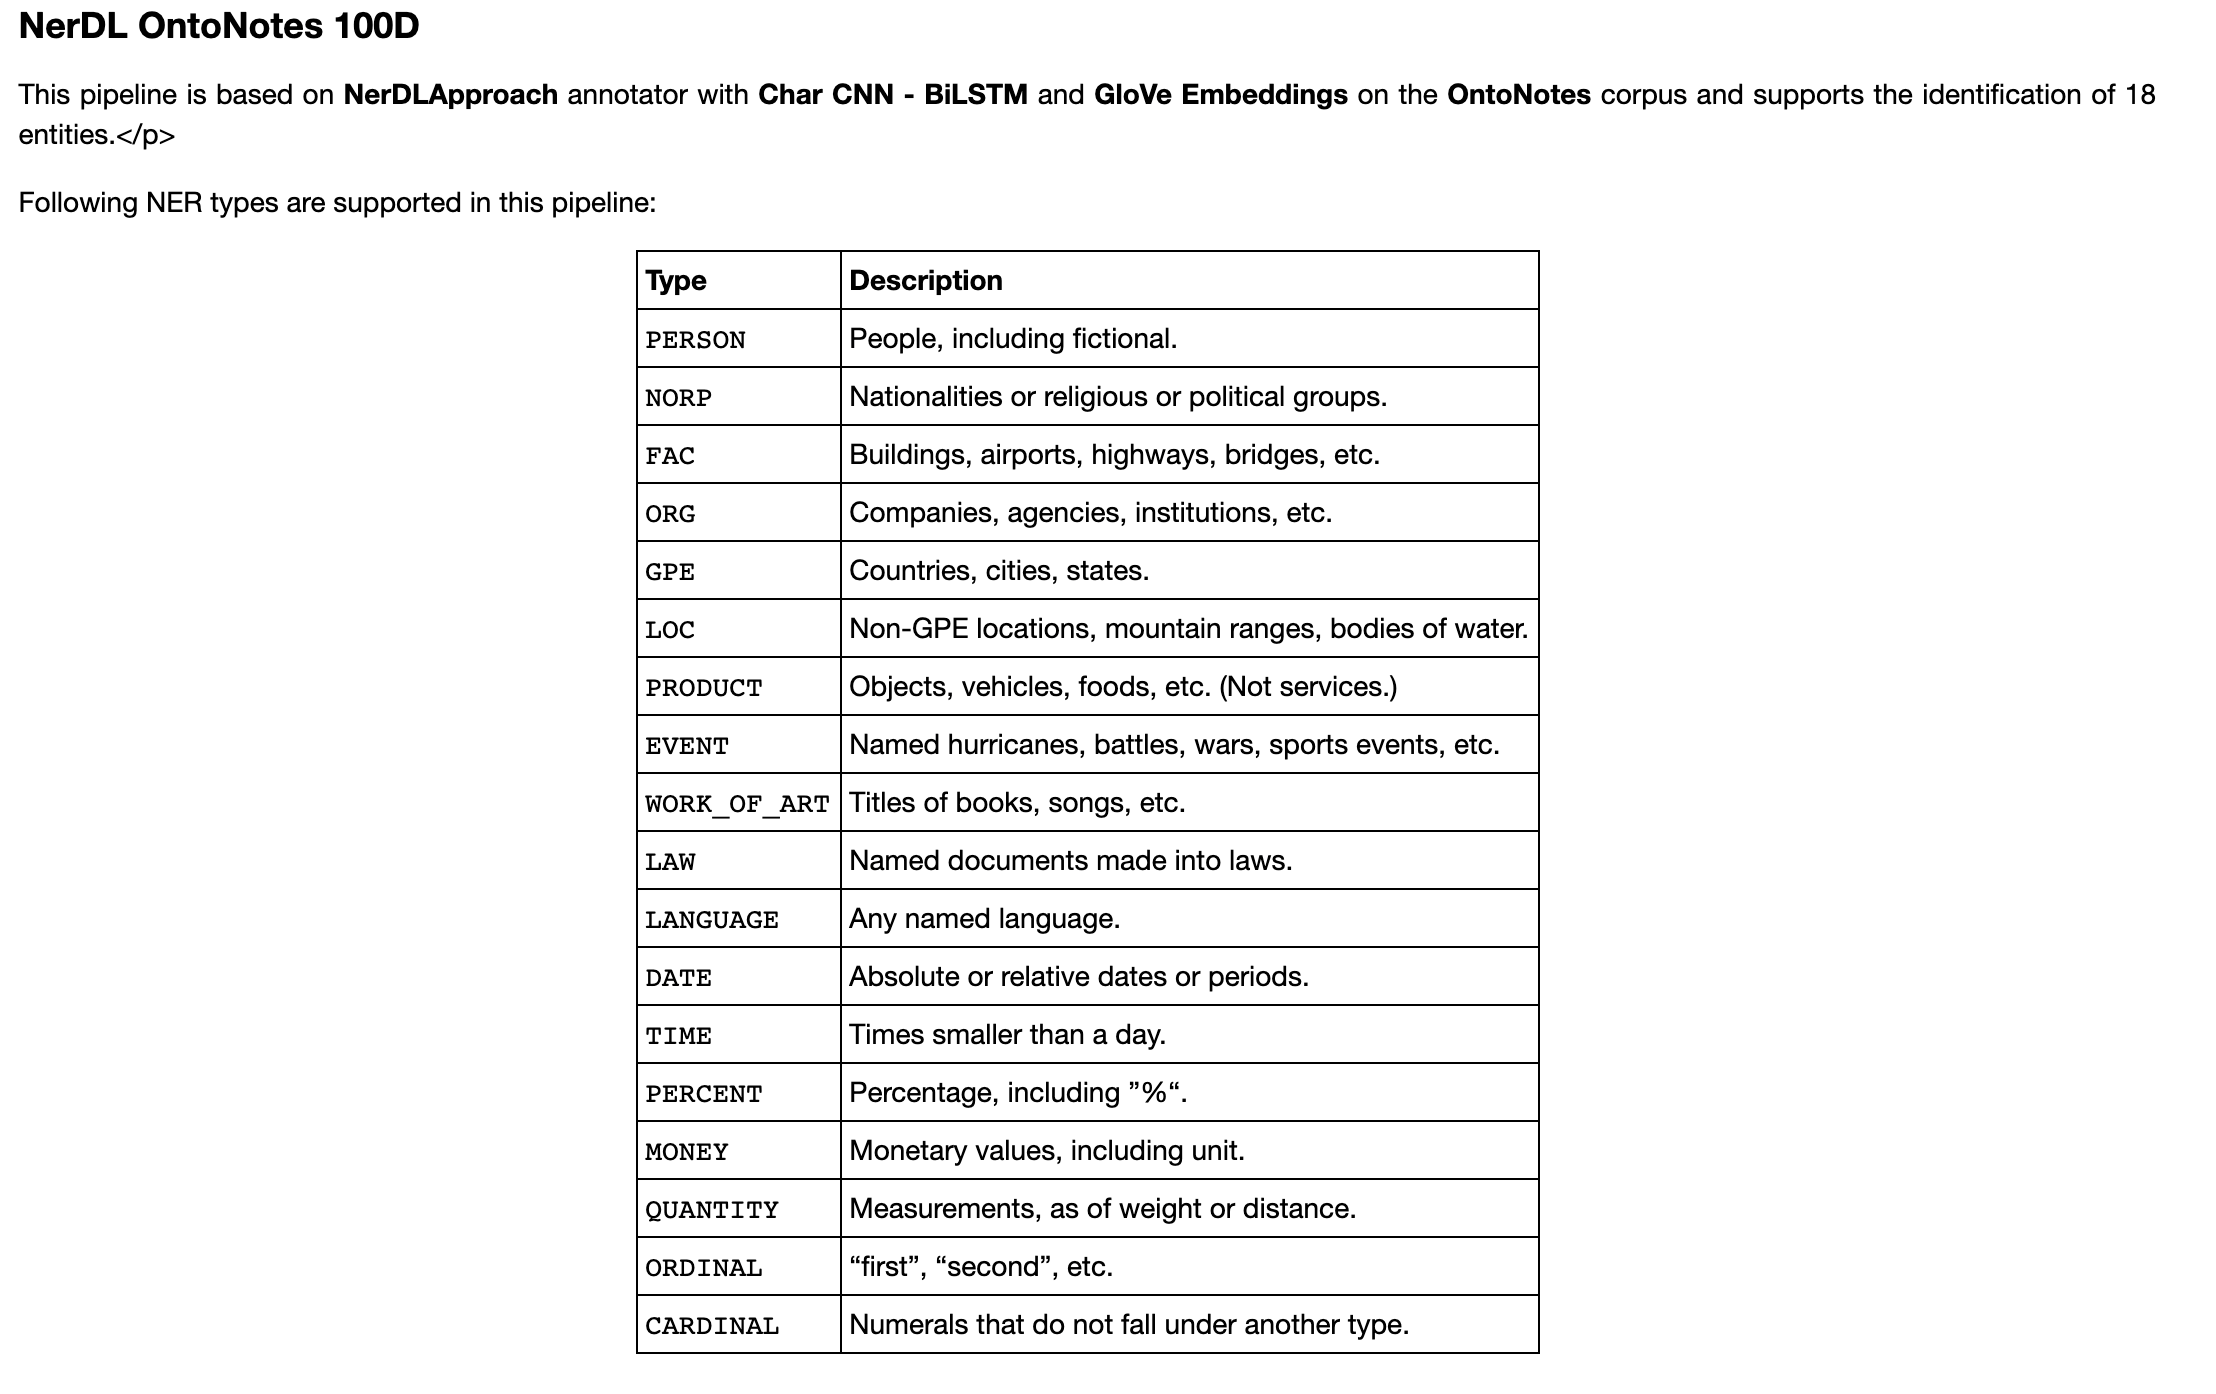

for a detailed notebbok, see https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Public/4.NERDL_Training.ipynb

In [ ]:
glove_embeddings = WordEmbeddingsModel.pretrained('glove_100d')\
          .setInputCols(["document", "token"])\
          .setOutputCol("embeddings")

onto_ner = NerDLModel.pretrained("onto_100", 'en') \
          .setInputCols(["document", "token", "embeddings"]) \
          .setOutputCol("ner")

ner_converter = NerConverter() \
  .setInputCols(["document", "token", "ner"]) \
  .setOutputCol("ner_chunk")


nlpPipeline = Pipeline(stages=[
 documentAssembler, 
 tokenizer,
 glove_embeddings,
 onto_ner,
 ner_converter
 ])

empty_df = spark.createDataFrame([['']]).toDF("description")

pipelineModel = nlpPipeline.fit(empty_df)

glove_100d download started this may take some time.
Approximate size to download 145.3 MB
[OK!]
onto_100 download started this may take some time.
Approximate size to download 13.5 MB
[OK!]


In [ ]:
result = pipelineModel.transform(news_df.limit(10))

result.select(F.explode(F.arrays_zip('ner_chunk.result', 'ner_chunk.metadata')).alias("cols")) \
.select(F.expr("cols['0']").alias("chunk"),
        F.expr("cols['1']['entity']").alias("ner_label")).show(truncate=False)

+--------------------------------+---------+
|chunk                           |ner_label|
+--------------------------------+---------+
|Carlyle Group                   |ORG      |
|next week                       |DATE     |
|summer                          |DATE     |
|Iraq                            |GPE      |
|Saturday                        |DATE     |
|three months                    |DATE     |
|US                              |GPE      |
|Friday                          |DATE     |
|the year                        |DATE     |
|#36;46                          |CARDINAL |
|Dell Inc                        |ORG      |
|#36;1.17 billion                |CARDINAL |
|the latest week                 |DATE     |
|#36;849.98 trillion             |CARDINAL |
|the Investment Company Institute|ORG      |
|Thursday                        |DATE     |
|July                            |DATE     |
|last week                       |DATE     |
|Thursday                        |DATE     |
|midsummer

In [ ]:

light_model = LightPipeline(pipelineModel)

light_result = light_model.fullAnnotate('Peter Parker is a nice persn and lives in New York. Bruce Wayne is also a nice guy and lives in Gotham City.')


chunks = []
entities = []

for n in light_result[0]['ner_chunk']:
        
    chunks.append(n.result)
    entities.append(n.metadata['entity']) 
    
    
import pandas as pd

df = pd.DataFrame({'chunks':chunks, 'entities':entities})

df

chunks entities
0  Peter Parker   PERSON
1      New York      GPE
2   Bruce Wayne   PERSON
3   Gotham City      GPE

#### Train a NER model

**To train a new NER from scratch, check out**

https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Public/4.NERDL_Training.ipynb

In [ ]:
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/src/test/resources/conll2003/eng.train

In [ ]:

from sparknlp.training import CoNLL

training_data = CoNLL().readDataset(spark, './eng.train')

training_data.show(3)

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                text|            document|            sentence|               token|                 pos|               label|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|EU rejects German...|[[document, 0, 47...|[[document, 0, 47...|[[token, 0, 1, EU...|[[pos, 0, 1, NNP,...|[[named_entity, 0...|
|     Peter Blackburn|[[document, 0, 14...|[[document, 0, 14...|[[token, 0, 4, Pe...|[[pos, 0, 4, NNP,...|[[named_entity, 0...|
| BRUSSELS 1996-08-22|[[document, 0, 18...|[[document, 0, 18...|[[token, 0, 7, BR...|[[pos, 0, 7, NNP,...|[[named_entity, 0...|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
only showing top 3 rows



In [ ]:
training_data.select(F.explode(F.arrays_zip('token.result','label.result')).alias("cols")) \
.select(F.expr("cols['0']").alias("token"),
        F.expr("cols['1']").alias("ground_truth")).groupBy('ground_truth').count().orderBy('count', ascending=False).show(100,truncate=False)

+------------+------+
|ground_truth|count |
+------------+------+
|O           |169578|
|B-LOC       |7140  |
|B-PER       |6600  |
|B-ORG       |6321  |
|I-PER       |4528  |
|I-ORG       |3704  |
|B-MISC      |3438  |
|I-LOC       |1157  |
|I-MISC      |1155  |
+------------+------+



In [ ]:
# You can use any word embeddings you want (Glove, Elmo, Bert, custom etc.)

glove_embeddings = WordEmbeddingsModel.pretrained('glove_100d')\
          .setInputCols(["document", "token"])\
          .setOutputCol("embeddings")

glove_100d download started this may take some time.
Approximate size to download 145.3 MB
[OK!]


In [ ]:
nerTagger = NerDLApproach()\
  .setInputCols(["sentence", "token", "embeddings"])\
  .setLabelColumn("label")\
  .setOutputCol("ner")\
  .setMaxEpochs(1)\
  .setLr(0.003)\
  .setPo(0.005)\
  .setBatchSize(32)\
  .setRandomSeed(0)\
  .setVerbose(1)\
  .setValidationSplit(0.2)\
  .setEvaluationLogExtended(True) \
  .setEnableOutputLogs(True)\
  .setIncludeConfidence(True)\
  .setOutputLogsPath('ner_logs') # if not set, logs will be written to ~/annotator_logs
 #.setGraphFolder('graphs') >> put your graph file (pb) under this folder if you are using a custom graph generated thru 4.1 NerDL-Graph.ipynb notebook
    
    
ner_pipeline = Pipeline(stages=[
          glove_embeddings,
          nerTagger
 ])

In [ ]:
%%time

ner_model = ner_pipeline.fit(training_data)

# 1 epoch takes around 2.5 min with batch size=32
# if you get an error for incompatible TF graph, use 4.1 NerDL-Graph.ipynb notebook to create a graph (or see the bottom cell of this notebook)

CPU times: user 60.3 ms, sys: 8.99 ms, total: 69.3 ms
Wall time: 3min


In [ ]:
#! cd ~/annotator_logs && ls -lt
!cd ner_logs && ls -lt

total 4
-rw-r--r-- 1 root root 1015 Sep 24 15:04 NerDLApproach_8e0d8924f0ea.log


In [ ]:
!head -n 45 ner_logs/NerDLApproach_8e0d8924f0ea.log


Name of the selected graph: ner-dl/blstm_10_100_128_120.pb
Training started - total epochs: 1 - lr: 0.003 - batch size: 32 - labels: 9 - chars: 84 - training examples: 11233


Epoch 1/1 started, lr: 0.003, dataset size: 11233


Epoch 1/1 - 146.05s - loss: 1179.5786 - batches: 354
Quality on validation dataset (20.0%), validation examples = 2808
time to finish evaluation: 12.68s
label	 tp	 fp	 fn	 prec	 rec	 f1
B-LOC	 1303	 127	 127	 0.91118884	 0.91118884	 0.91118884
I-ORG	 547	 92	 237	 0.85602504	 0.6977041	 0.76879835
I-MISC	 163	 90	 62	 0.64426875	 0.72444445	 0.6820084
I-LOC	 226	 209	 21	 0.51954025	 0.91497976	 0.6627566
I-PER	 868	 74	 18	 0.92144376	 0.979684	 0.9496718
B-MISC	 552	 79	 118	 0.8748019	 0.8238806	 0.84857804
B-ORG	 1050	 138	 230	 0.88383836	 0.8203125	 0.85089135
B-PER	 1252	 144	 56	 0.89684814	 0.9571865	 0.92603546
tp: 5961 fp: 953 fn: 869 labels: 8
Macro-average	 prec: 0.8134943, rec: 0.8536726, f1: 0.8330993
Micro-average	 prec: 0.8621637, rec: 0.8727672

In [ ]:
ner_model.stages[1].write().overwrite().save('NER_glove_20200924_e1_b32')


In [ ]:
# load back and use in any pipeline

loaded_ner_model = NerDLModel.load("NER_glove_20200924_e1_b32")\
 .setInputCols(["sentence", "token", "embeddings"])\
 .setOutputCol("ner")


### Text Classification

for a detailed notebook, see https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Public/5.Text_Classification_with_ClassifierDL.ipynb

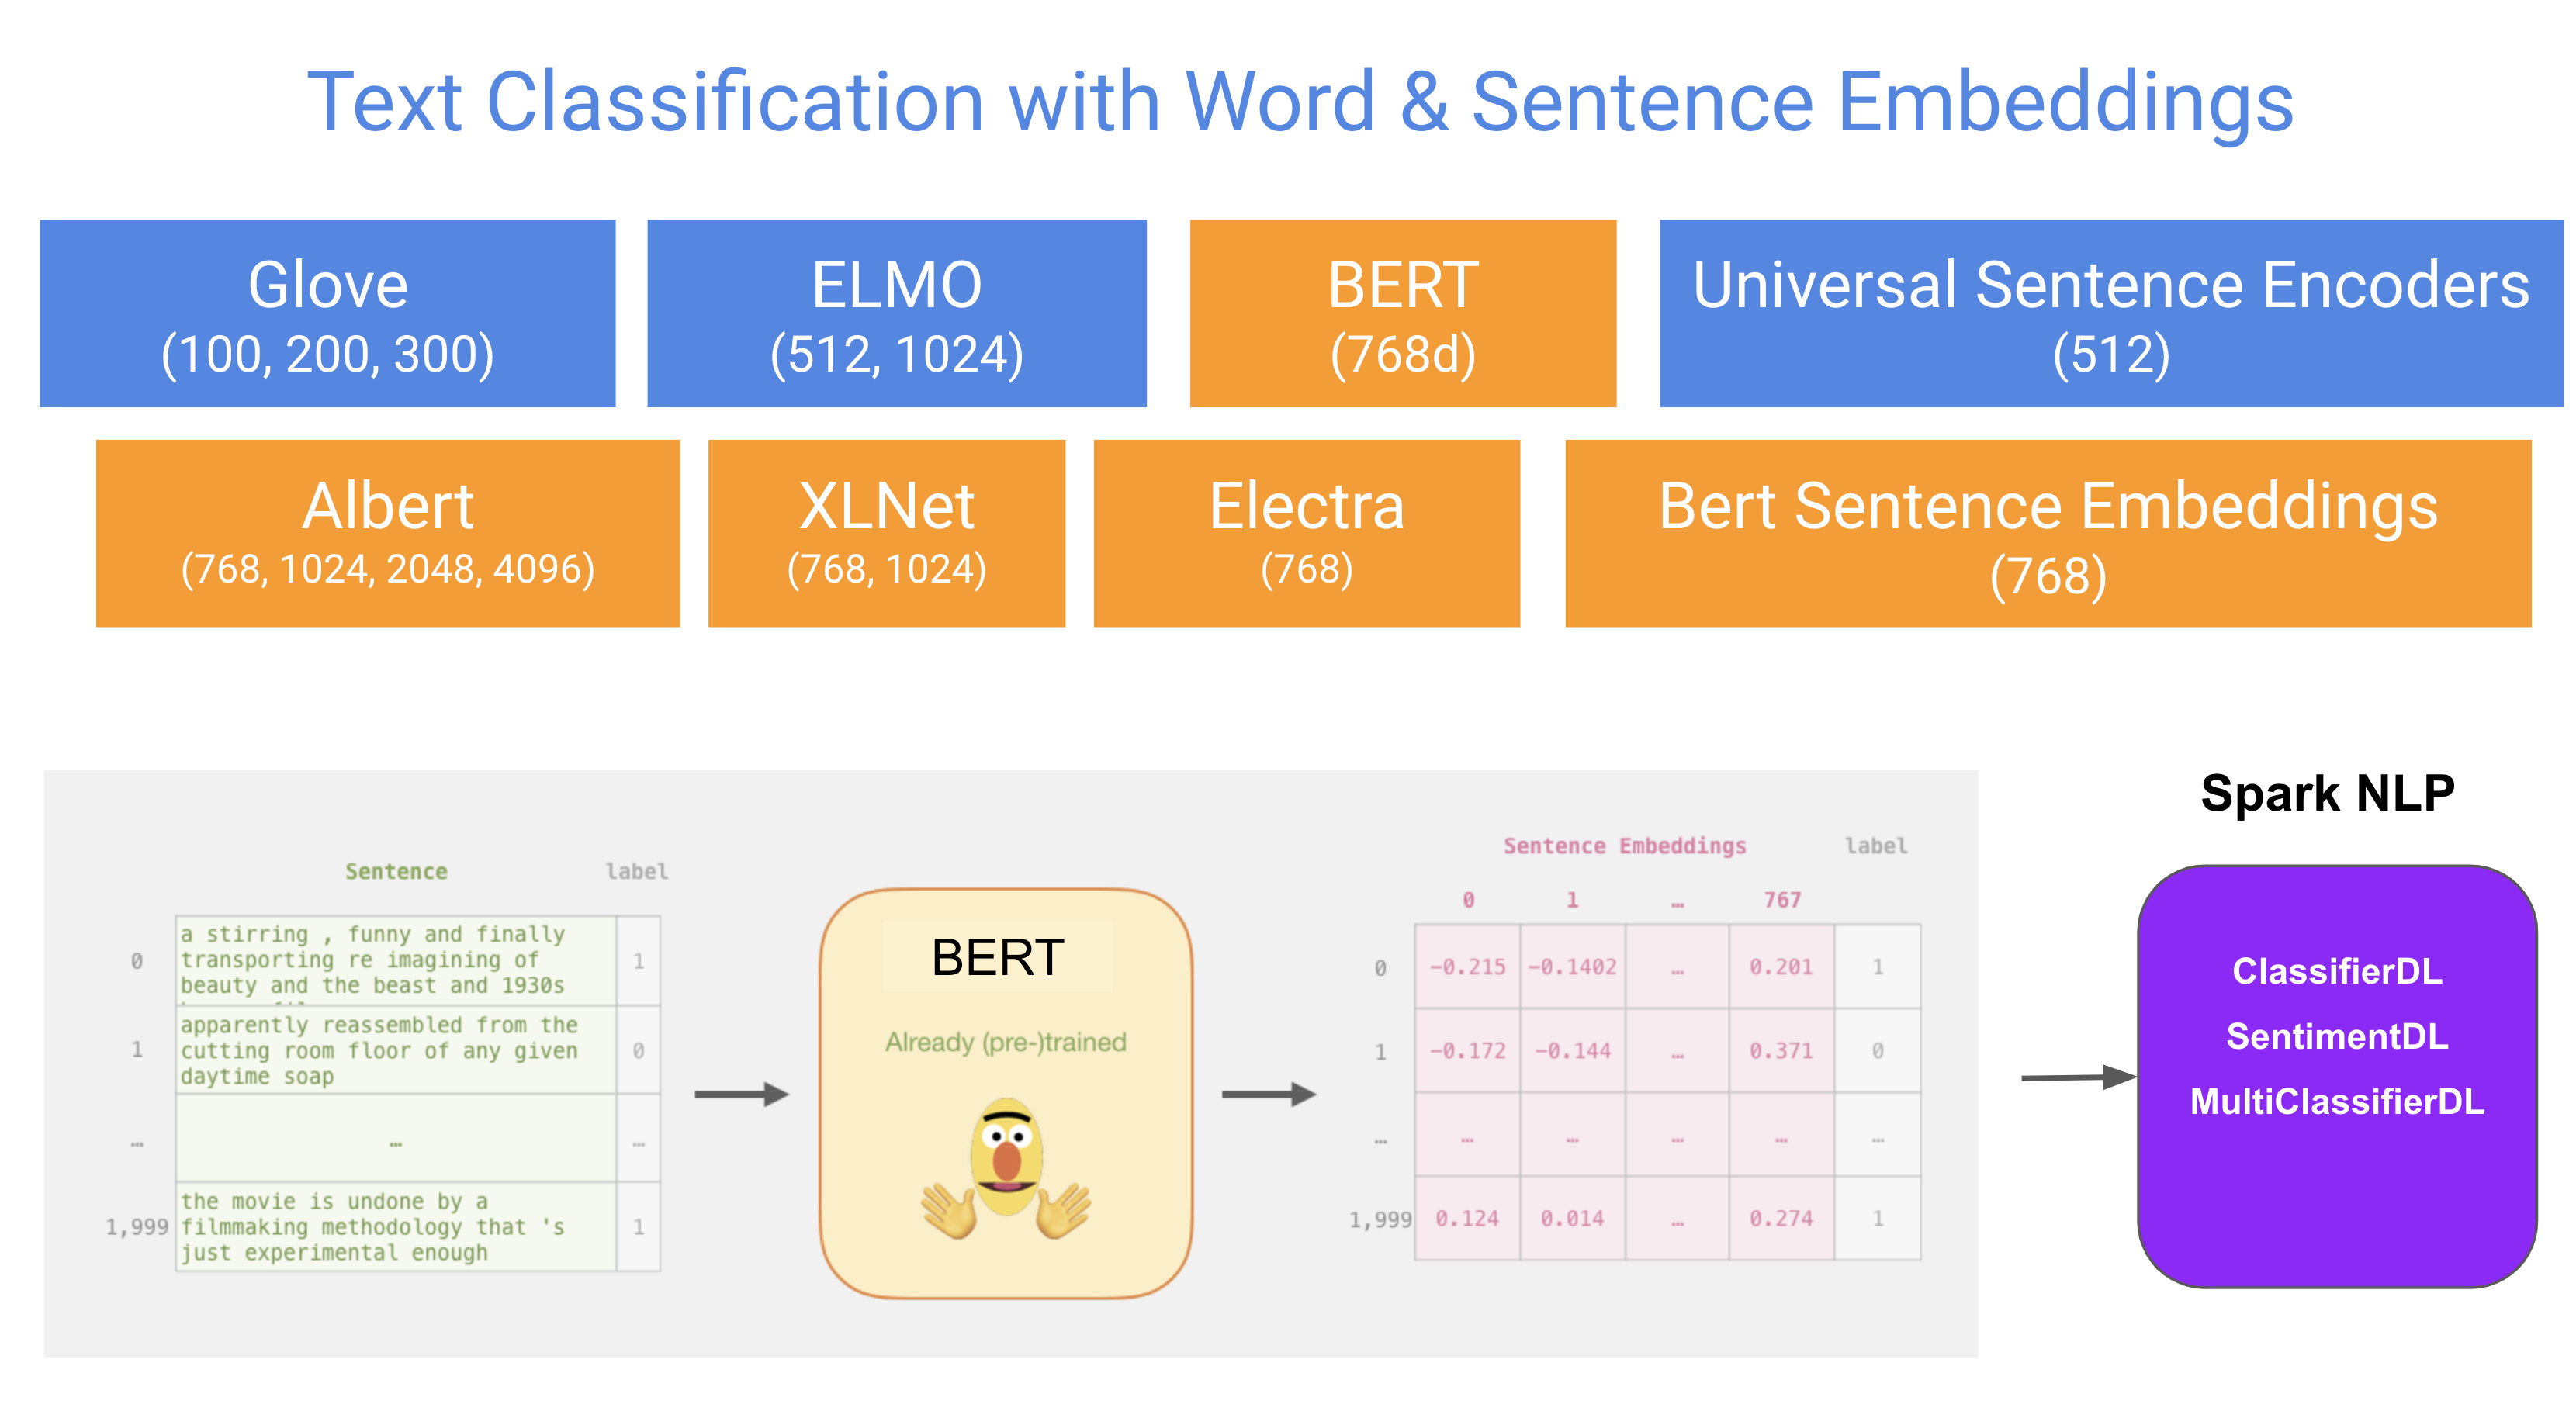

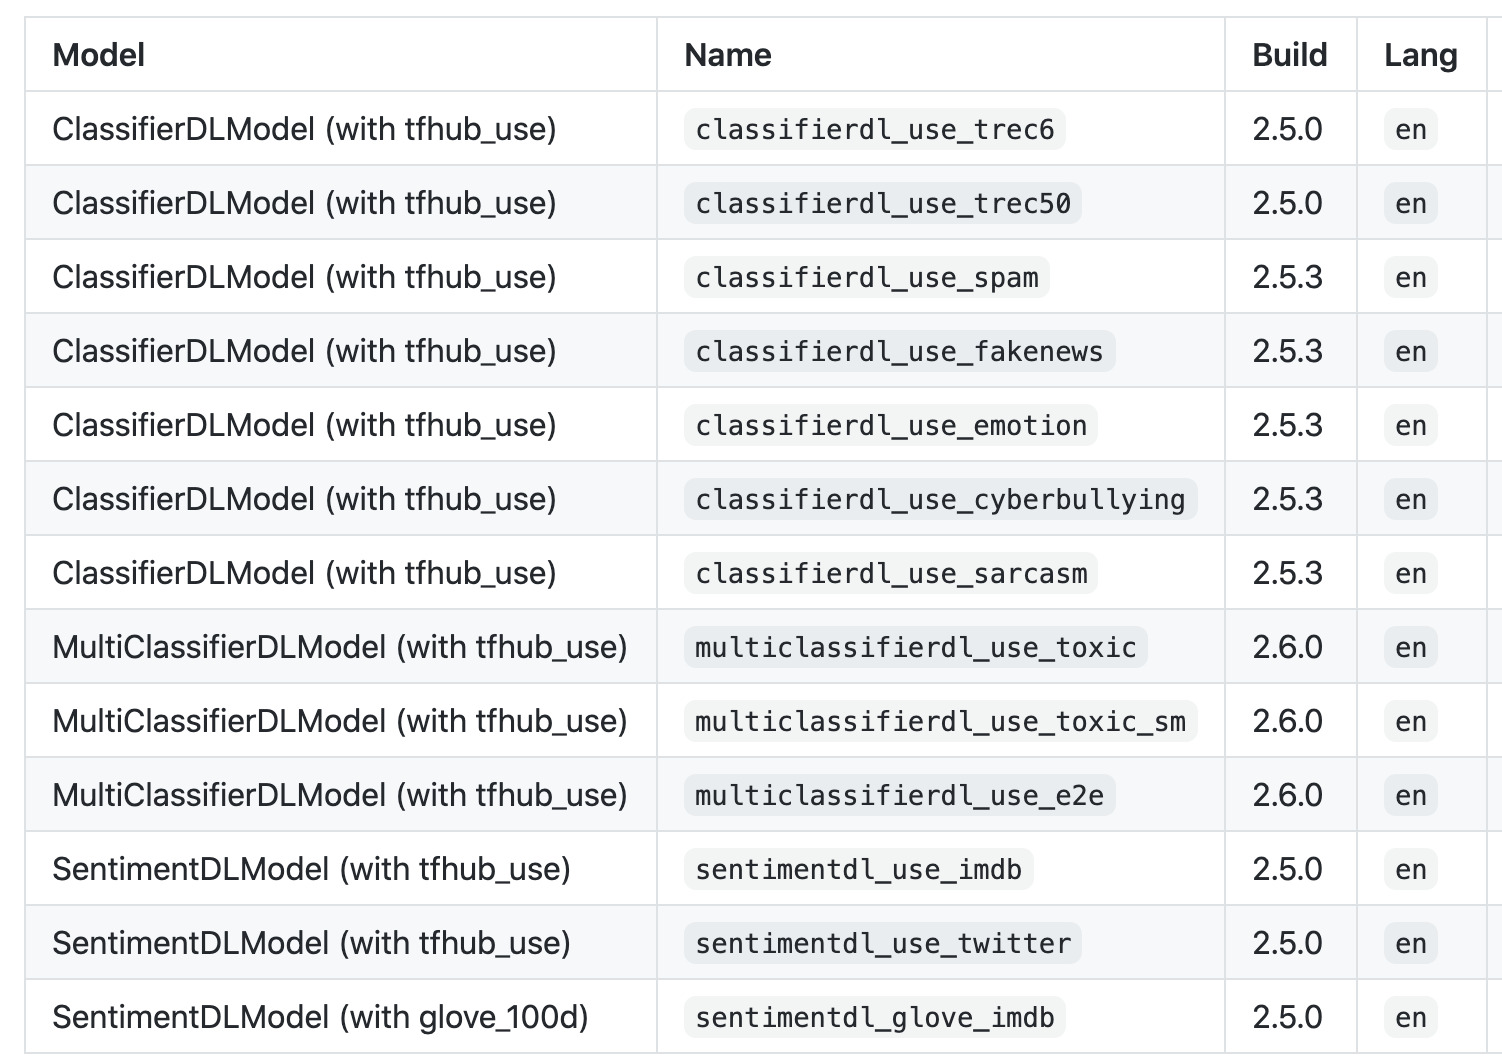

In [ ]:
! wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Public/data/news_category_test.csv

In [ ]:
from pyspark.sql.functions import col

trainDataset = spark.read \
      .option("header", True) \
      .csv("news_category_train.csv")

trainDataset.groupBy("category") \
    .count() \
    .orderBy(col("count").desc()) \
    .show()

+--------+-----+
|category|count|
+--------+-----+
|   World|30000|
|  Sports|30000|
|Sci/Tech|30000|
|Business|30000|
+--------+-----+



In [ ]:
testDataset = spark.read \
      .option("header", True) \
      .csv("news_category_test.csv")


testDataset.groupBy("category") \
    .count() \
    .orderBy(col("count").desc()) \
    .show()

+--------+-----+
|category|count|
+--------+-----+
|   World| 1900|
|  Sports| 1900|
|Sci/Tech| 1900|
|Business| 1900|
+--------+-----+



In [ ]:
# actual content is inside description column
document = DocumentAssembler()\
    .setInputCol("description")\
    .setOutputCol("document")
    
# we can also use sentece detector here if we want to train on and get predictions for each sentence

use_embeddings = UniversalSentenceEncoder.pretrained('tfhub_use').\
  setInputCols(["document"]).\
  setOutputCol("sentence_embeddings")

# the classes/labels/categories are in category column
classsifierdl = ClassifierDLApproach()\
  .setInputCols(["sentence_embeddings"])\
  .setOutputCol("class")\
  .setLabelColumn("category")\
  .setMaxEpochs(5)\
  .setEnableOutputLogs(True)

use_clf_pipeline = Pipeline(
    stages = [
        document,
        use_embeddings,
        classsifierdl
    ])

tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]


In [ ]:
use_pipelineModel = use_clf_pipeline.fit(trainDataset)
# 5 epochs takes around 10 min


In [ ]:
!cd ~/annotator_logs && ls -lt


total 8
-rw-r--r-- 1 root root 459 Sep 24 14:59 ClassifierDLApproach_96fa340c54ab.log
-rw-r--r-- 1 root root 456 Sep 24 14:44 ClassifierDLApproach_62ca7e922218.log


In [ ]:
!cat ~/annotator_logs/ClassifierDLApproach_96fa340c54ab.log


Training started - epochs: 5 - learning_rate: 0.005 - batch_size: 64 - training_examples: 120000 - classes: 4
Epoch 0/5 - 39.11s - loss: 1594.217 - acc: 0.880975 - batches: 1875
Epoch 1/5 - 37.41s - loss: 1578.2402 - acc: 0.89266664 - batches: 1875
Epoch 2/5 - 37.82s - loss: 1568.2295 - acc: 0.8976667 - batches: 1875
Epoch 3/5 - 37.22s - loss: 1562.4728 - acc: 0.901025 - batches: 1875
Epoch 4/5 - 40.86s - loss: 1558.2263 - acc: 0.90399164 - batches: 1875


In [ ]:
from sparknlp.base import LightPipeline

light_model = LightPipeline(use_pipelineModel)

text='''
Fearing the fate of Italy, the centre-right government has threatened to be merciless with those who flout tough restrictions. 
As of Wednesday it will also include all shops being closed across Greece, with the exception of supermarkets. Banks, pharmacies, pet-stores, mobile phone stores, opticians, bakers, mini-markets, couriers and food delivery outlets are among the few that will also be allowed to remain open.
'''
result = light_model.annotate(text)

result['class']

['Business']

In [ ]:
light_model.annotate('the soccer games will be postponed.')


{'class': ['Sports'],
 'document': ['the soccer games will be postponed.'],
 'sentence_embeddings': ['the soccer games will be postponed.']}